### Problem - 1
Context
The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.
Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.


Data Description :
System measures used:
1.lread - Reads (transfers per second ) between system memory and user memory.
2.lwrite - writes (transfers per second) between system memory and user memory.
3.scall - Number of system calls of all types per second
4.sread - Number of system read calls per second .
5.swrite - Number of system write calls per second .
6.fork - Number of system fork calls per second.
7.exec - Number of system exec calls per second.
8.rchar - Number of characters transferred per second by system read calls
9.wchar - Number of characters transfreed per second by system write calls
10.pgout - Number of page out requests per second
11.ppgout - Number of pages, paged out per second
12.pgfree - Number of pages per second placed on the free list.
13.pgscan - Number of pages checked if they can be freed per second
14.atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
15.pgin - Number of page-in requests per second
16.ppgin - Number of pages paged in per second
17.pflt - Number of page faults caused by protection errors (copy-on-writes).
18.vflt - Number of page faults caused by address translation .
19.runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
20.freemem - Number of memory pages available to user processes

In [2]:
import numpy as np
import pandas as pd

# for visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for cart model
from sklearn.tree import DecisionTreeClassifier

# To build linear regression_model
import statsmodels.api as sm

# For randomized data splitting
from sklearn.model_selection import train_test_split,GridSearchCV

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_excel('compactiv.xlsx')

In [4]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

The Dataset contains 22 data columns. Out of which 13 are float and 8 are int and 1 is object.

In [6]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [7]:
df.shape

(8192, 22)

The Shape of the dataset is 8192 rows and 22 columns

In [8]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

The summary of the statistics ranges from 0 to max 2526649.00 in different columns.

In [9]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

There are few null values in the dataset. wchar and rchar has null values.

In [10]:
df.duplicated().sum()

0

No duplicaterecords

## Treat the Bad Data

In [11]:
df['rchar'].unique()

array([ 40671.,    448.,     nan, ..., 325948.,  62571., 111111.])

<Axes: xlabel='rchar'>

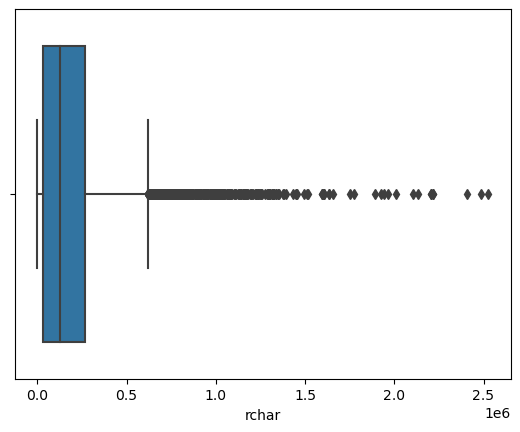

In [12]:
sns.boxplot(x='rchar', data=df)

In [13]:
df['rchar'].describe()

count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64

In [14]:
df['rchar'] = df['rchar'].replace(np.NaN, df['rchar'].median())

In [15]:
df['wchar'].unique()

array([53995.,  8385., 31950., ..., 85282., 29505., 22256.])

<Axes: xlabel='wchar'>

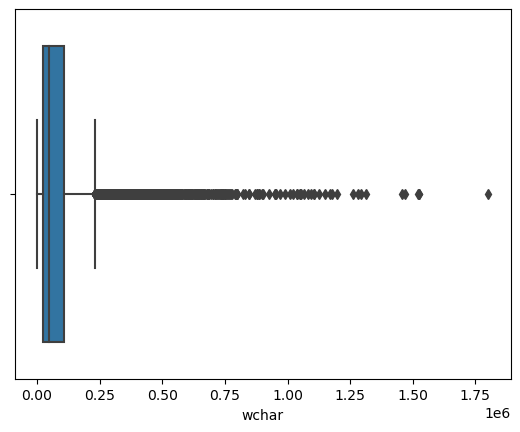

In [16]:
sns.boxplot(x='wchar', data=df)

In [17]:
df['wchar'].describe()

count    8.177000e+03
mean     9.590299e+04
std      1.408417e+05
min      1.498000e+03
25%      2.291600e+04
50%      4.661900e+04
75%      1.061010e+05
max      1.801623e+06
Name: wchar, dtype: float64

In [18]:
df['wchar'] =  df['wchar'].replace(np.NaN, df['wchar'].median())

Impute median for both wchar and rchar since both have outliers and are not normally distributed.

In [19]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [20]:
df_num = df.select_dtypes(['int64','float64'])
df_cat = df.select_dtypes(['object'])

In [21]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   runqsz  8192 non-null   object
dtypes: object(1)
memory usage: 64.1+ KB


## Univariant analysis

lwrite


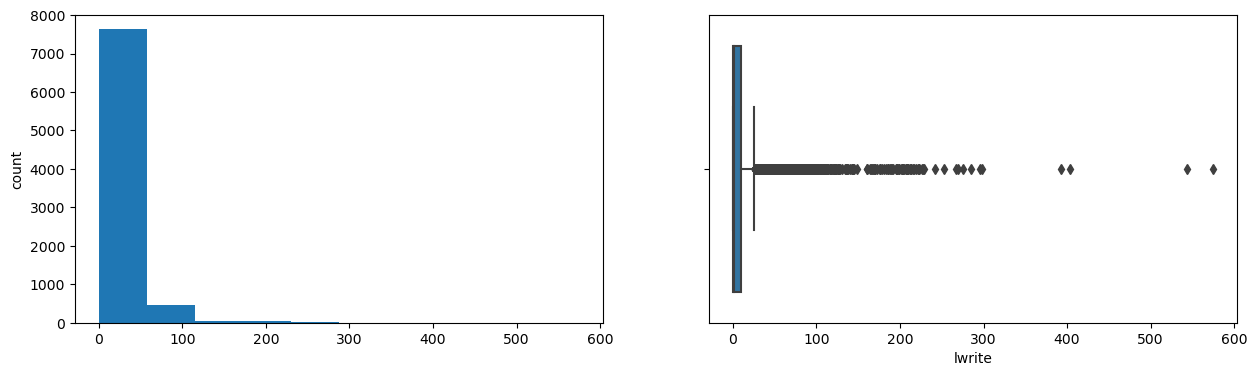

scall


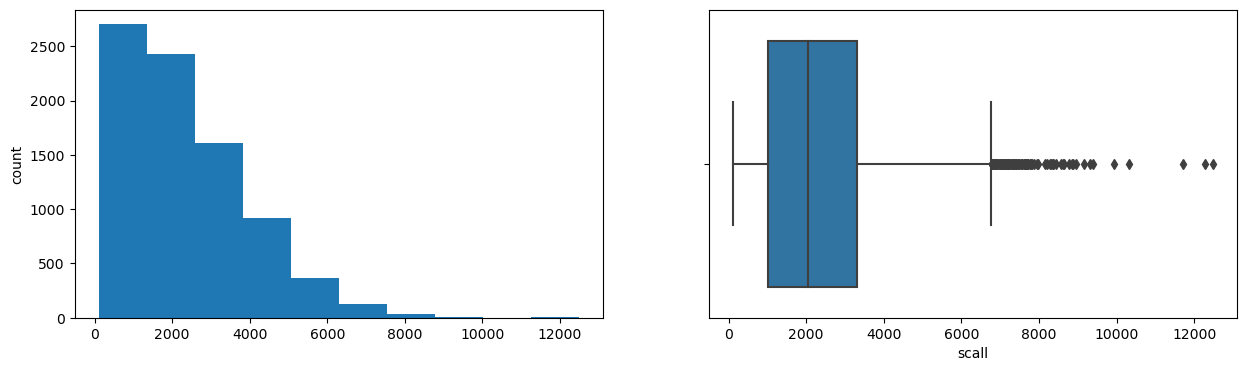

sread


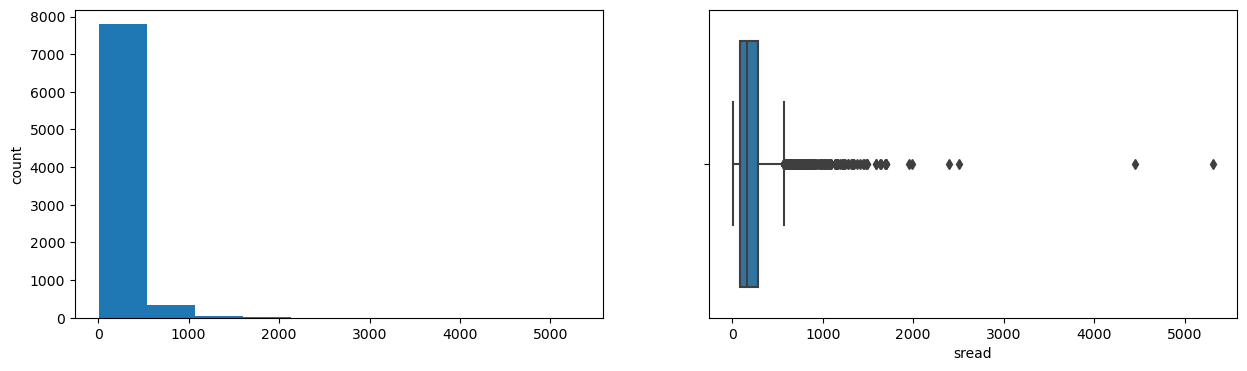

swrite


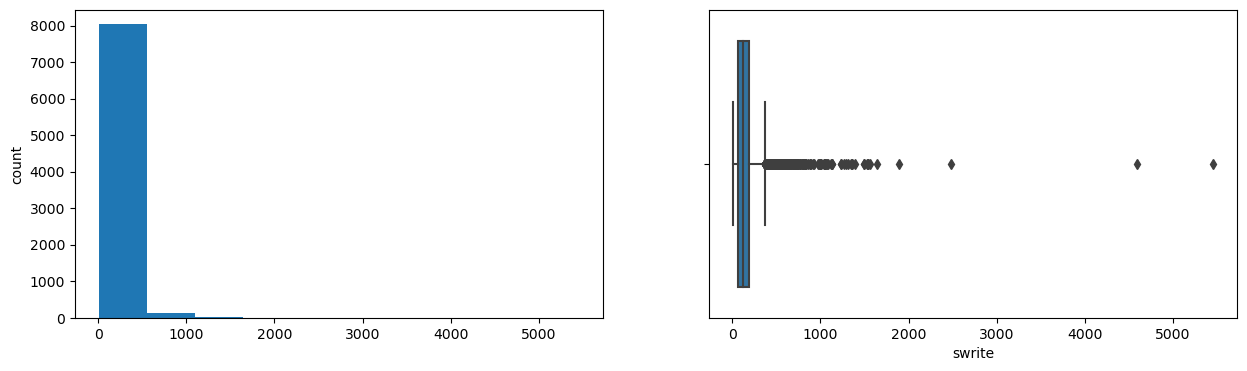

fork


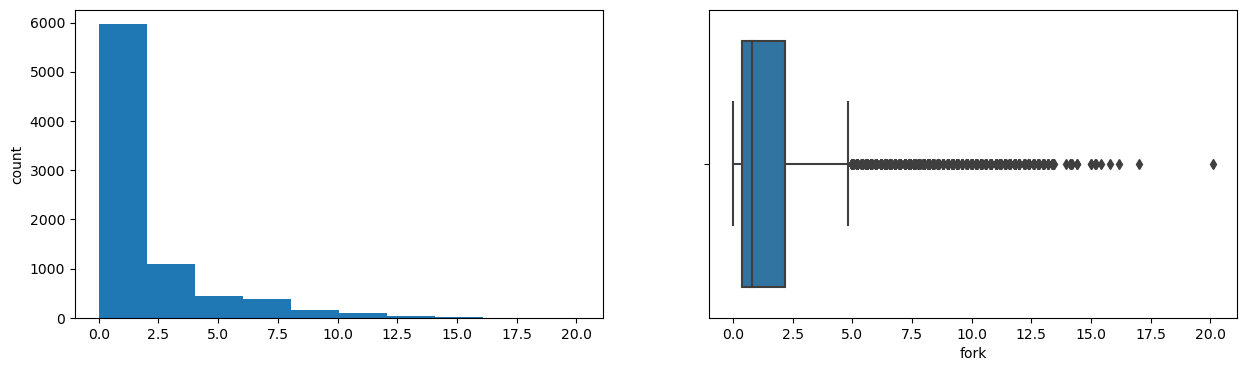

exec


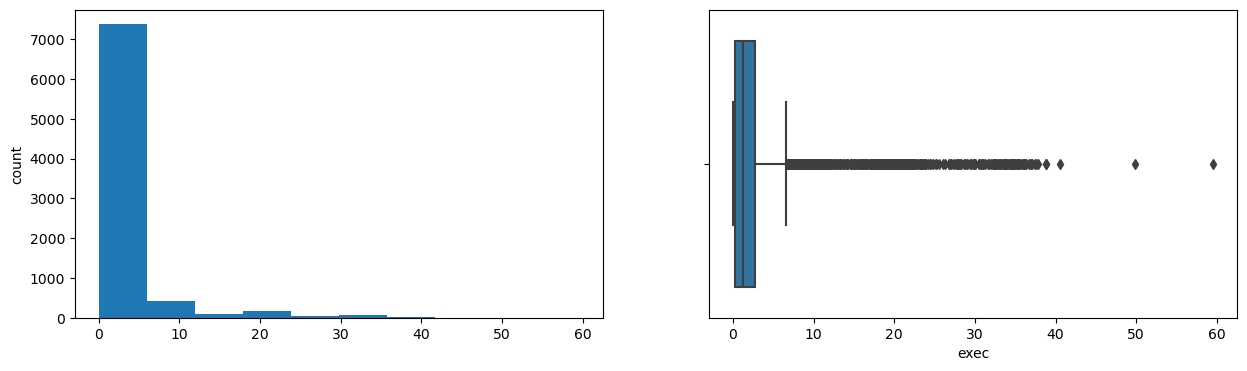

rchar


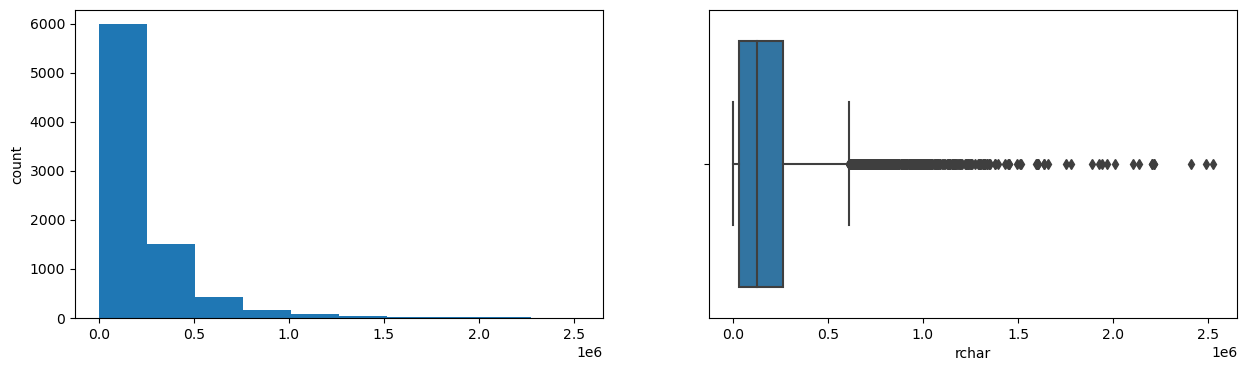

wchar


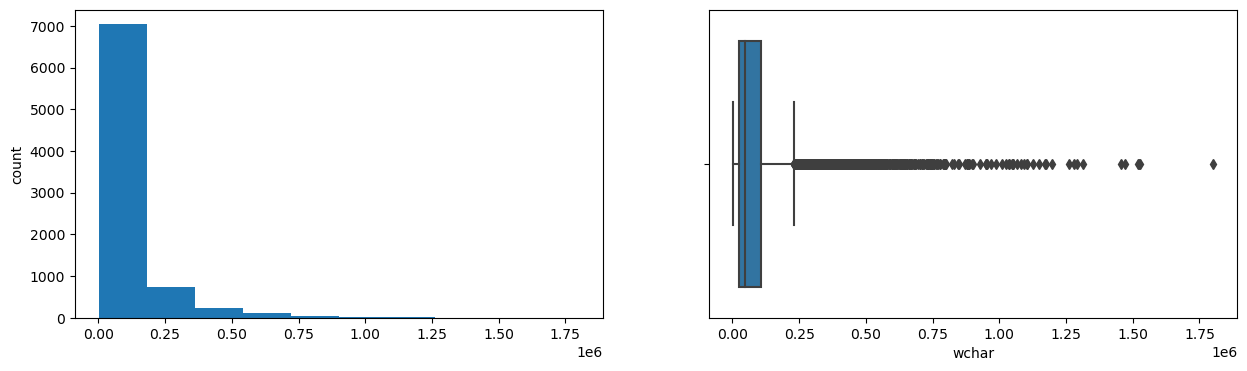

pgout


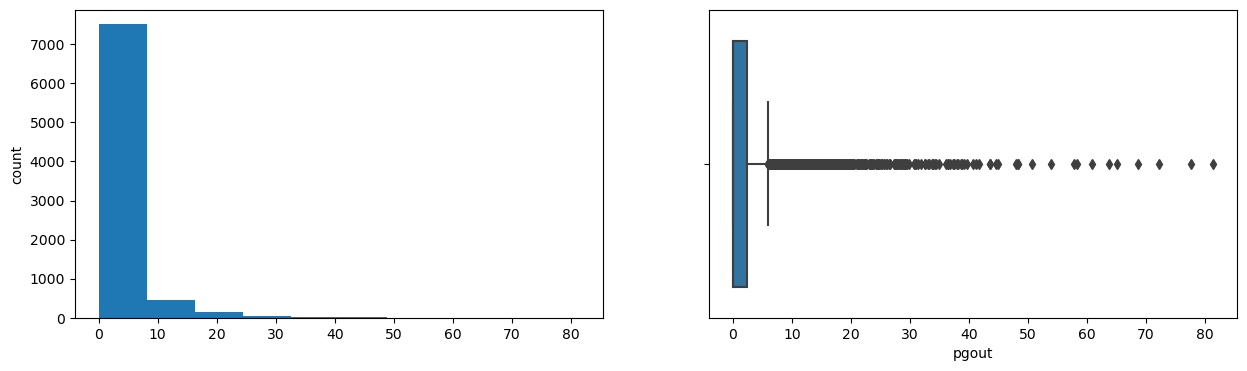

ppgout


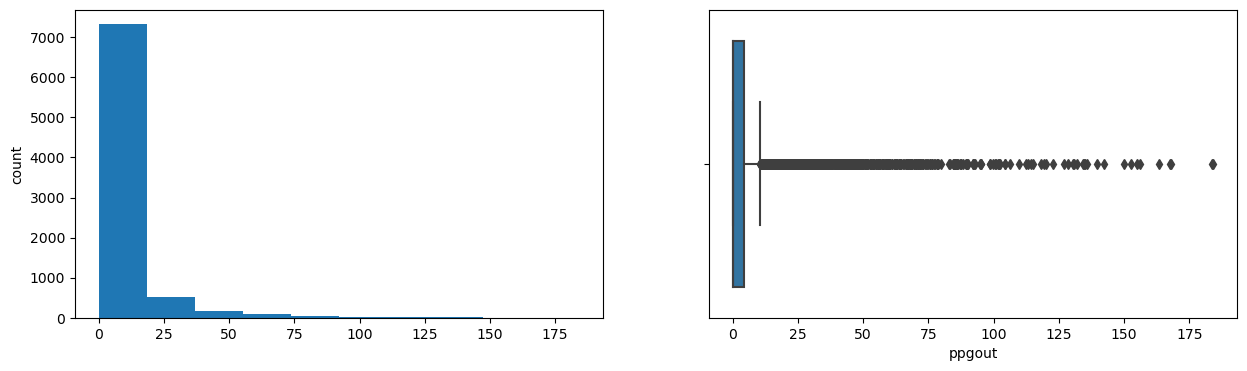

pgfree


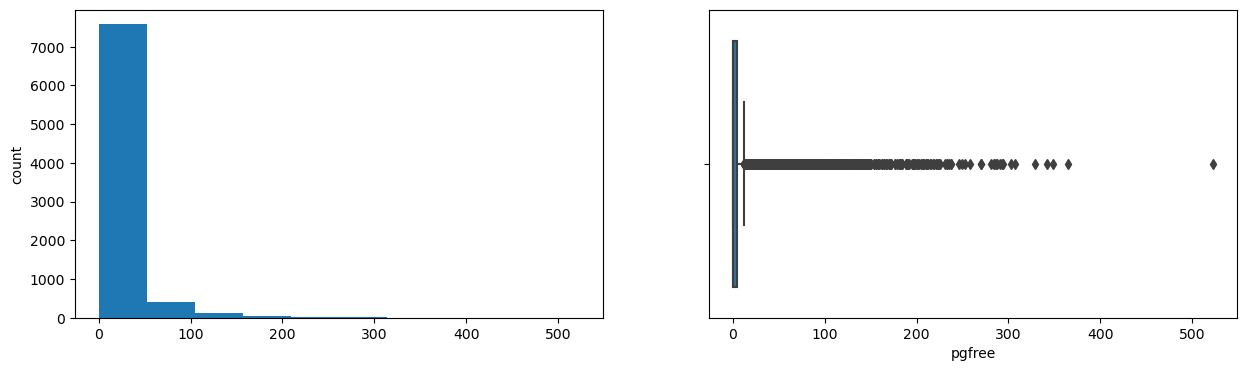

pgscan


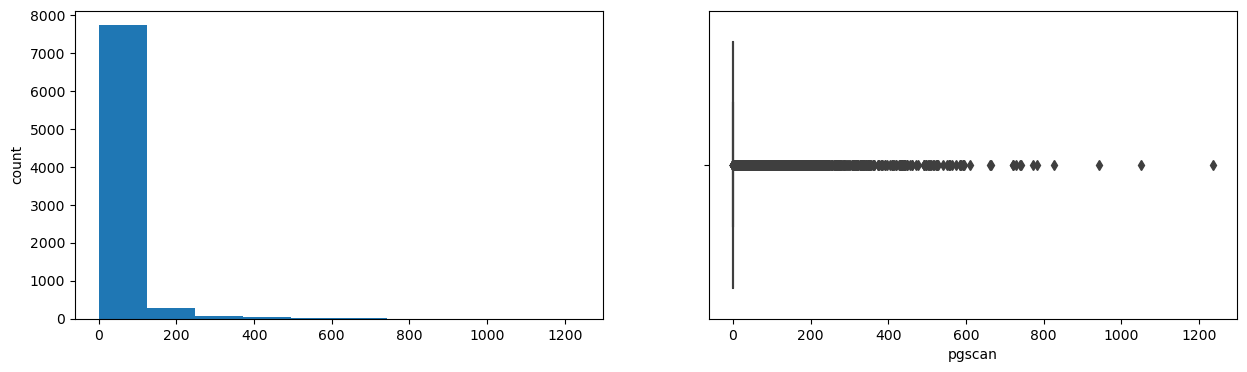

atch


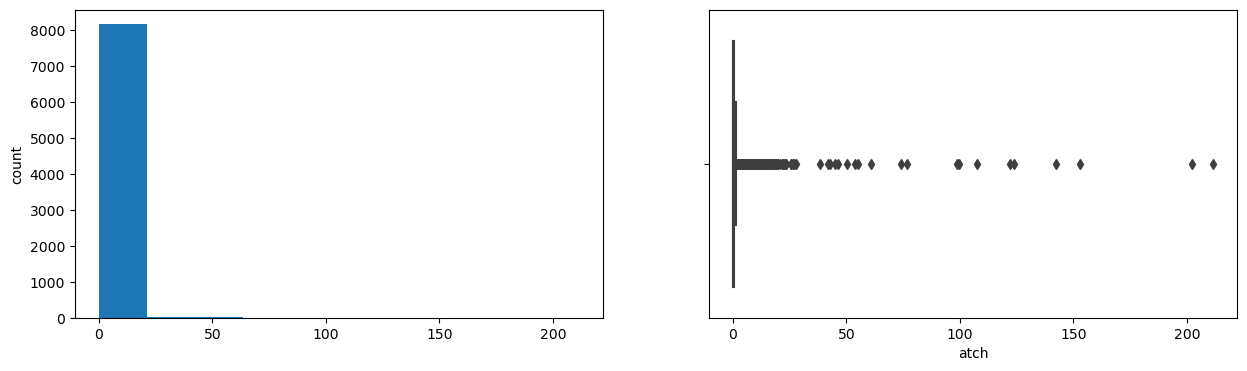

pgin


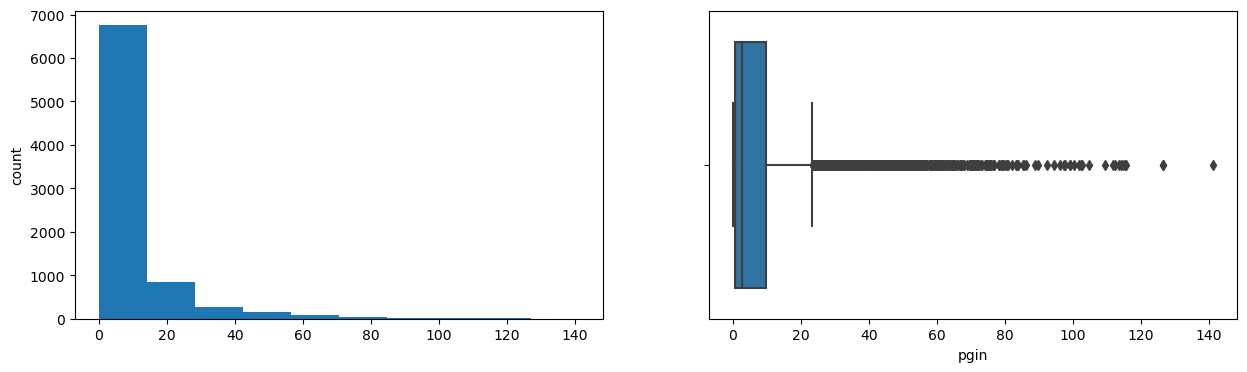

ppgin


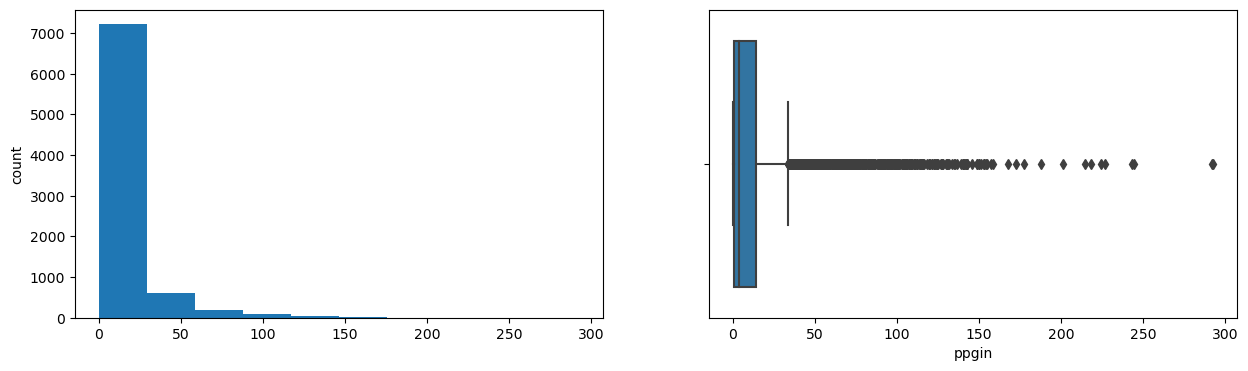

pflt


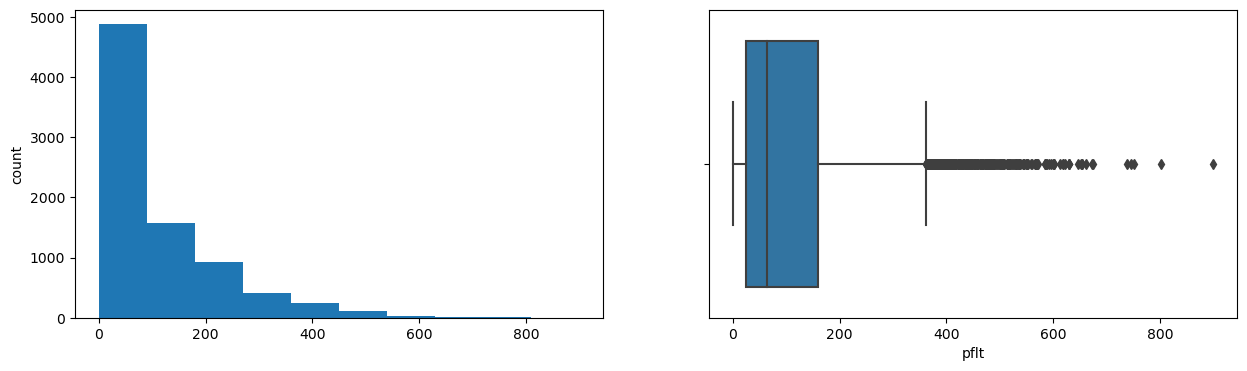

vflt


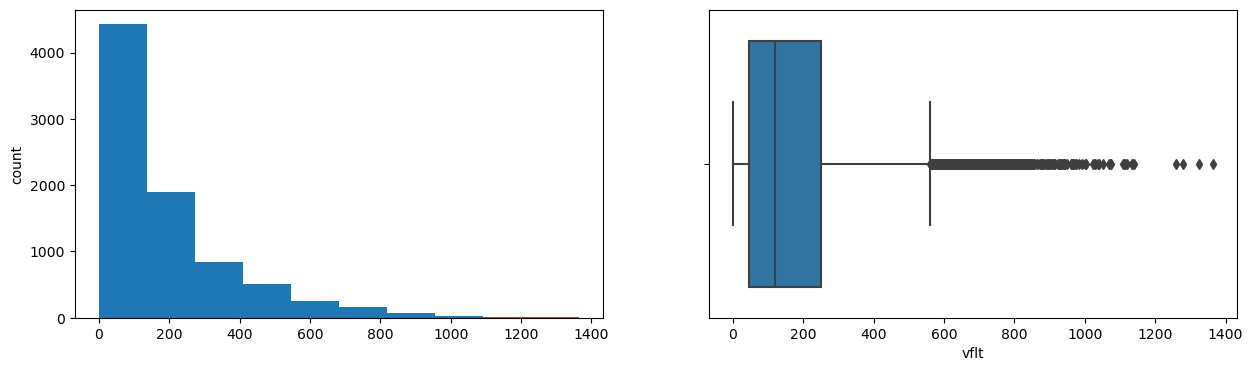

freemem


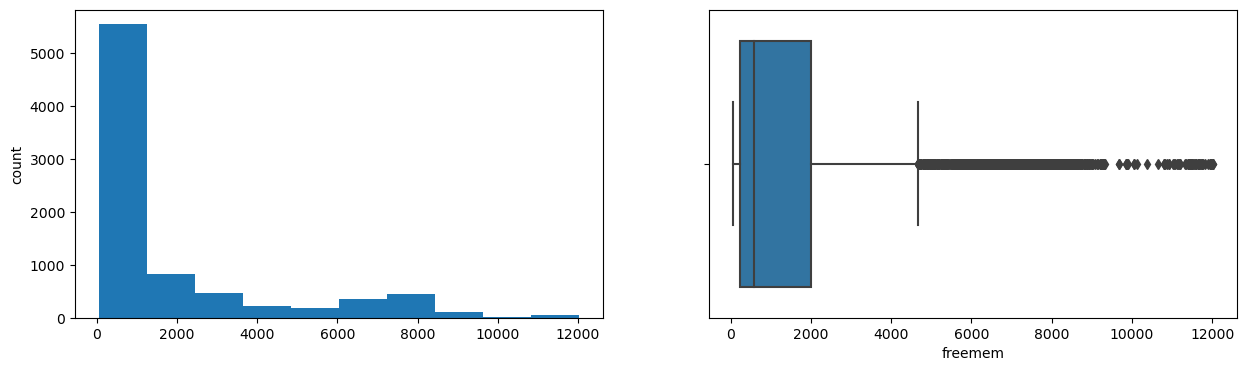

freeswap


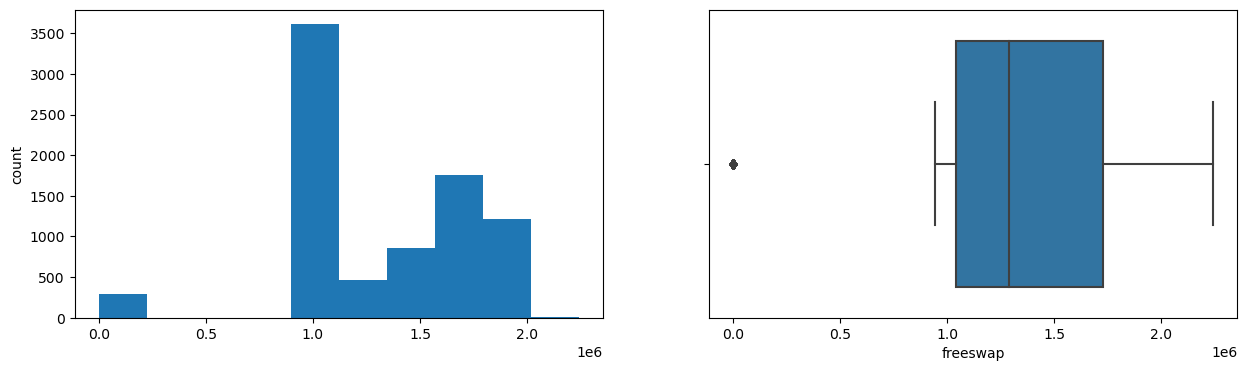

usr


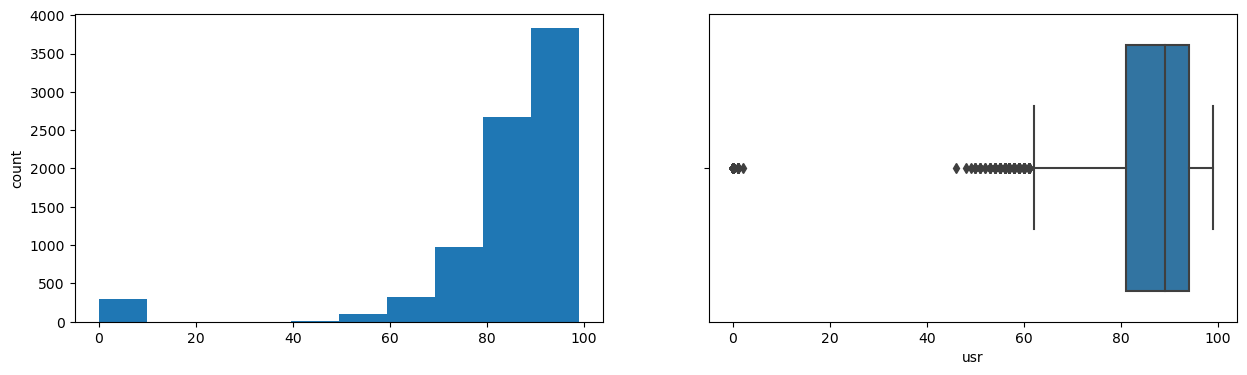

In [23]:
for col in df_num.columns[1:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(x=df_num[col], bins=10)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[col])
    plt.show()

Observations:

1)lwrite has too many outliers. The max value is 6K+ for writes between system memory and user memory.

2)Scall has median around 2000 but it also has outliers. Which is 12k+.

3)Number of system read calls per second has very minimal mean and median is around 1. Very few outboxed outliers. But it has crossed 6k+.


4)Number of system write calls per second(Swrite) is showing same behaviour has sread.

5)The fork is having wide range of observations from 0 to 12.5.Huge outliers found.

6)The exec is having less observations only few calls have reached 7k+.

7)Rchar and wchar both are almost having similar behaviour. Except that wchar has less outliers compared to rchar. The characters transferred is around 1.

8)Pgout and ppgout both are right skewed. Data is not symmetric and there is 0.5 median.

9)Ppgin has min value of 0 with max value has 292.

10)Pflt has median of 62.8 and the data is right skewed


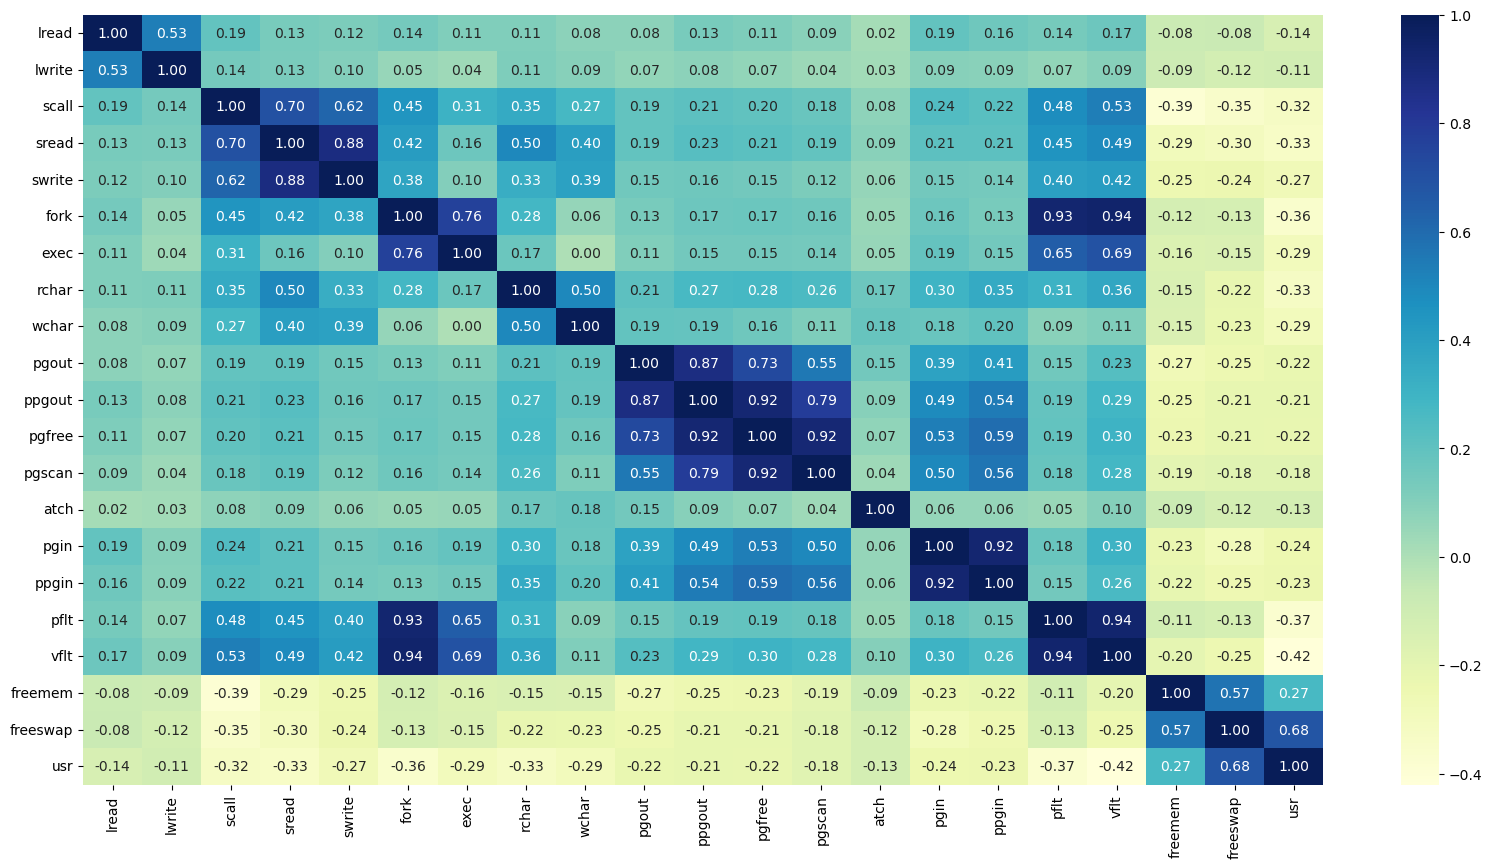

In [24]:
plt.figure(figsize  = (20,10))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

From the correlation plot, we can see that various attributes of the car are highly correlated to each other. Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

## Outlier treatment

In [25]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range -25.0 and upper range 47.0


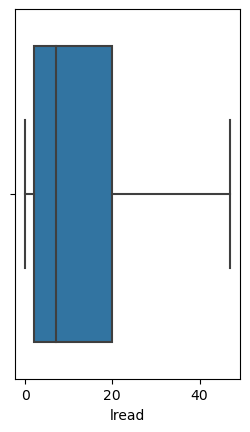

lower range -15.0 and upper range 25.0


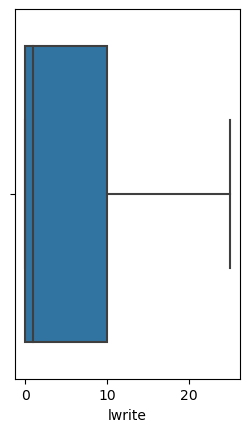

lower range -2445.875 and upper range 6775.125


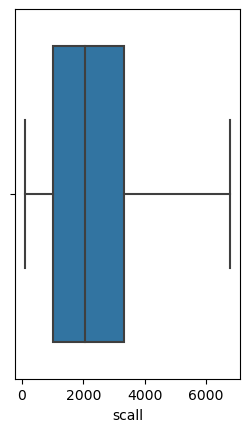

lower range -203.5 and upper range 568.5


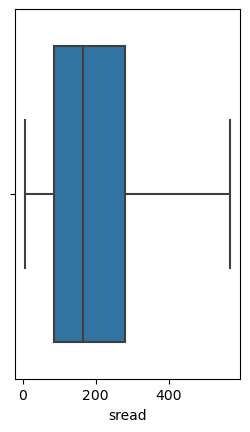

lower range -120.0 and upper range 368.0


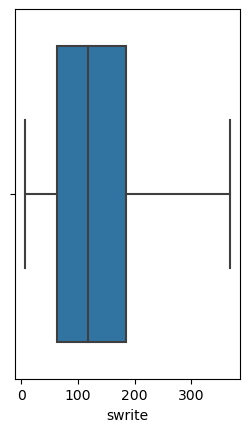

lower range -2.3000000000000003 and upper range 4.9


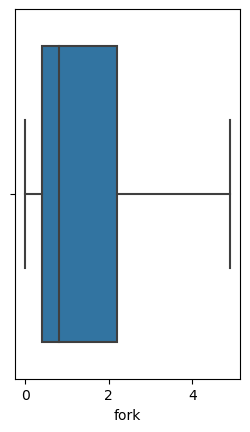

lower range -3.6999999999999993 and upper range 6.699999999999999


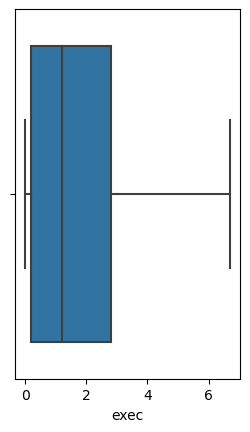

lower range -310940.875 and upper range 611196.125


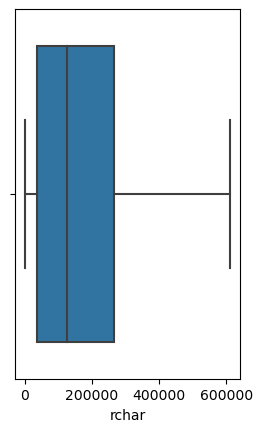

lower range -101611.125 and upper range 230625.875


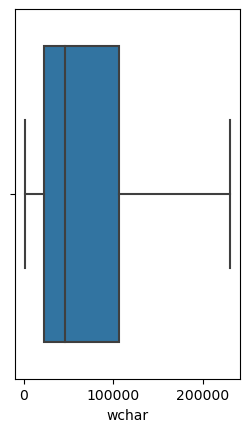

lower range -3.5999999999999996 and upper range 6.0


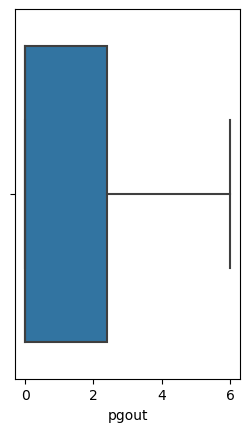

lower range -6.300000000000001 and upper range 10.5


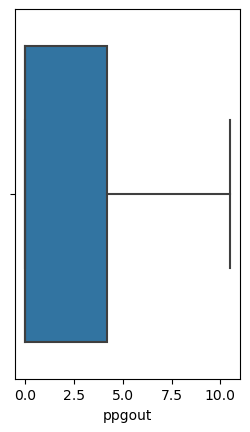

lower range -7.5 and upper range 12.5


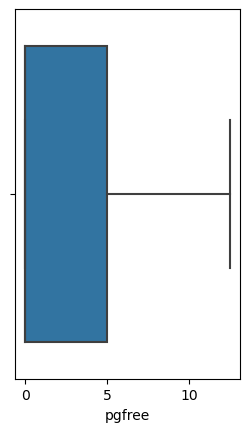

lower range 0.0 and upper range 0.0


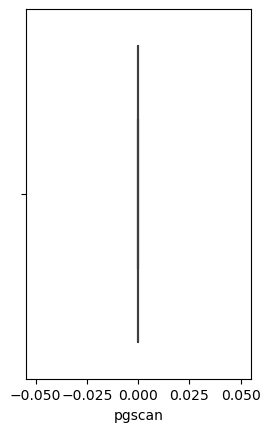

lower range -0.8999999999999999 and upper range 1.5


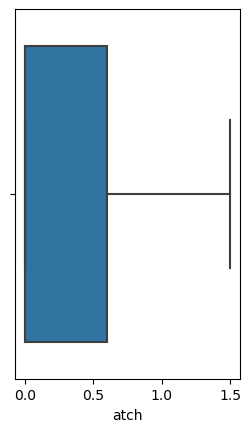

lower range -13.147500000000003 and upper range 23.512500000000003


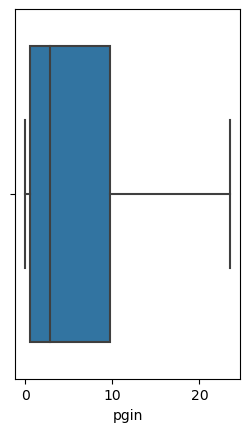

lower range -19.2 and upper range 33.6


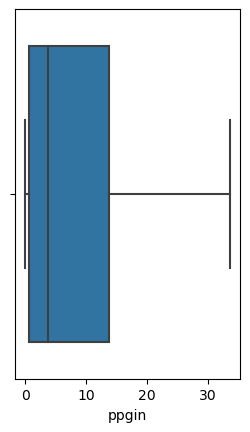

lower range -176.89999999999998 and upper range 361.5


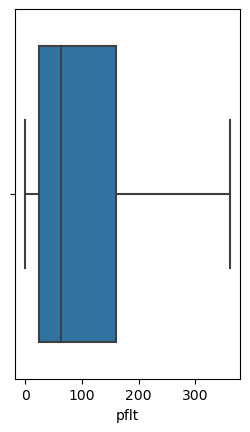

lower range -264.20000000000005 and upper range 561.4000000000001


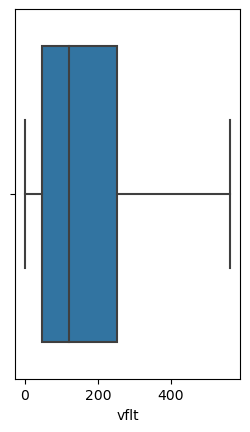

lower range -2425.875 and upper range 4659.125


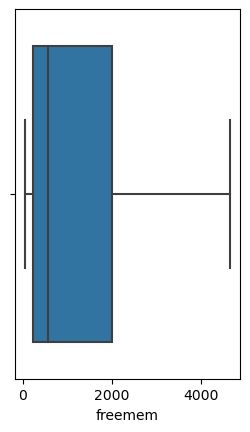

lower range 10989.5 and upper range 2762013.5


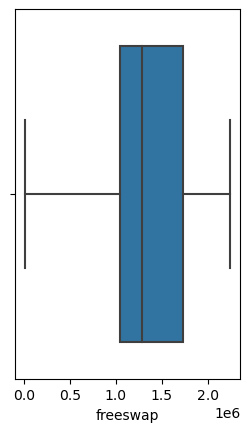

lower range 61.5 and upper range 113.5


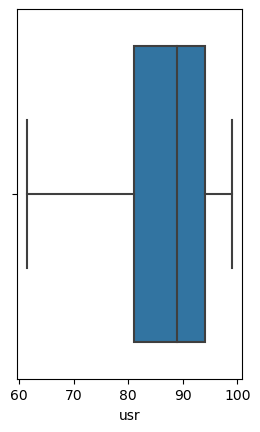

In [26]:
for col in df_num[1:]:
    lr, ur = remove_outliers(df_num[col])
    print("lower range",lr, "and upper range", ur)
    df_num[col] = np.where(df_num[col]> ur,ur,df_num[col])
    df_num[col] = np.where(df_num[col]<lr,lr,df_num[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=df_num[col])
    plt.show()

After the box plot technique of outlier treatment, the outliers are removed. It uses a technique of lower index and upper index for eliminating the outliers.

## Univariant analysis for Categorical variable

runqsz


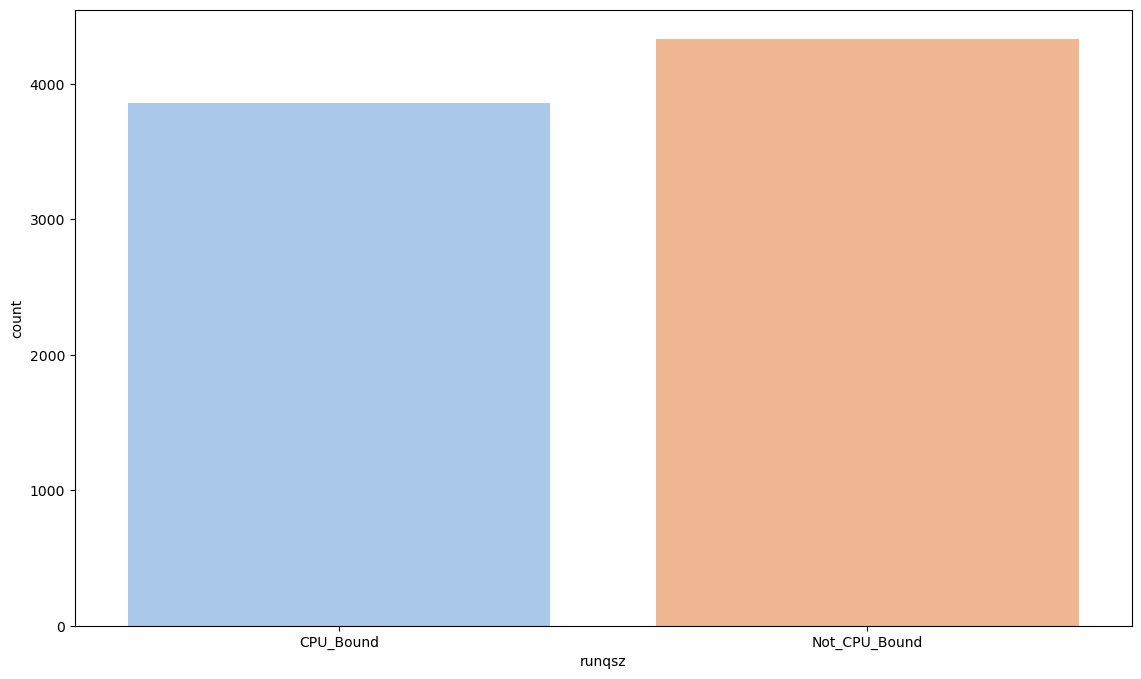

In [27]:
for col in df_cat[1:]:
    print(col)
    plt.figure(figsize=(30,8))
    plt.subplot(1,2,1)
    sns.countplot(x=df_cat[col],  palette='pastel')
    plt.show()

Observations:
We have one categorical variable runqsz. The number of kernel threads in memory that are waiting for a CPU to run is around 3800 and other way its around 4500.


## Bivariant analysis¶

<Axes: xlabel='lread', ylabel='lwrite'>

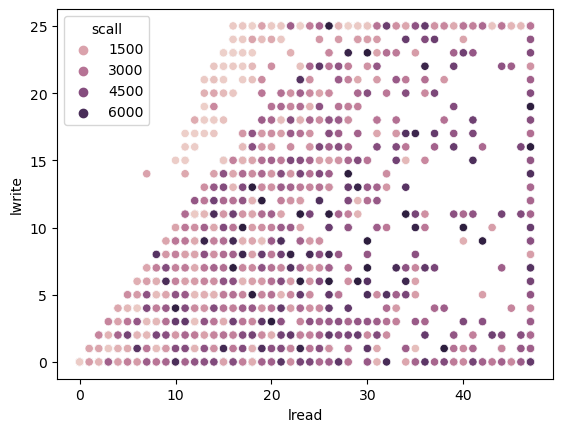

In [28]:
# numeric vs numeric
sns.scatterplot(data=df_num, x='lread', y='lwrite', hue='scall')

<Axes: xlabel='sread', ylabel='swrite'>

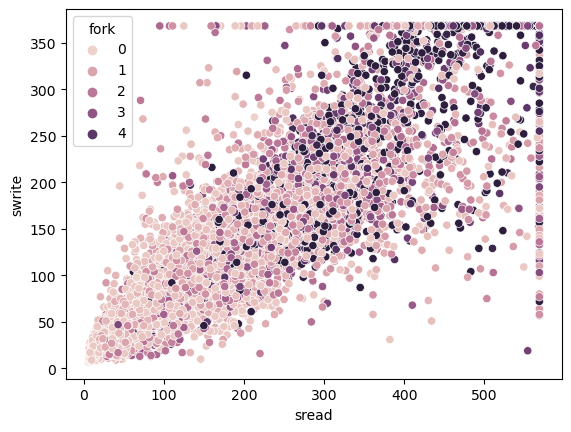

In [29]:
sns.scatterplot(data=df_num, x='sread', y='swrite', hue='fork')

<Axes: xlabel='rchar', ylabel='wchar'>

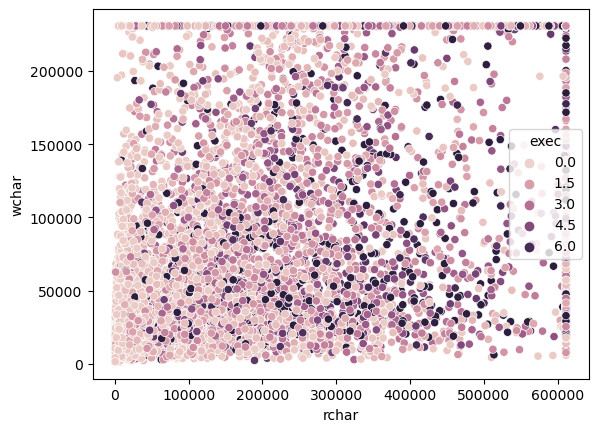

In [30]:
sns.scatterplot(data=df_num, x='rchar', y='wchar', hue='exec')

<Axes: xlabel='pgout', ylabel='ppgout'>

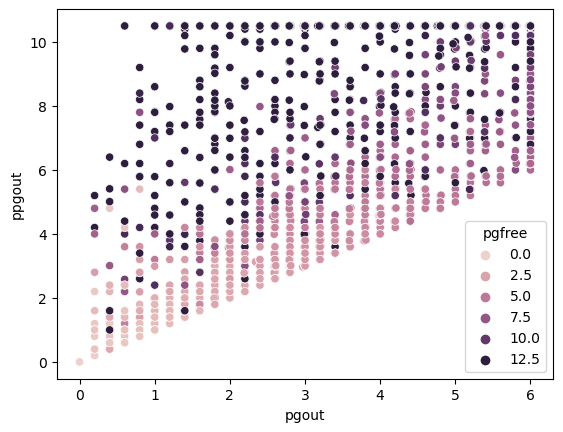

In [31]:
sns.scatterplot(data=df_num, x='pgout', y='ppgout', hue='pgfree')

Observations:

The correlation is increasing as and when the no of writes is increasing. Its higly positively correlated with sread. 

The correlation is increasing as and when the no of writes is increasing. Its slightly positively correlated.

We can see different patterns. When exec is 0.o there is strong correlation. But when exec is 6 its not correlated much.

<Axes: xlabel='rchar', ylabel='runqsz'>

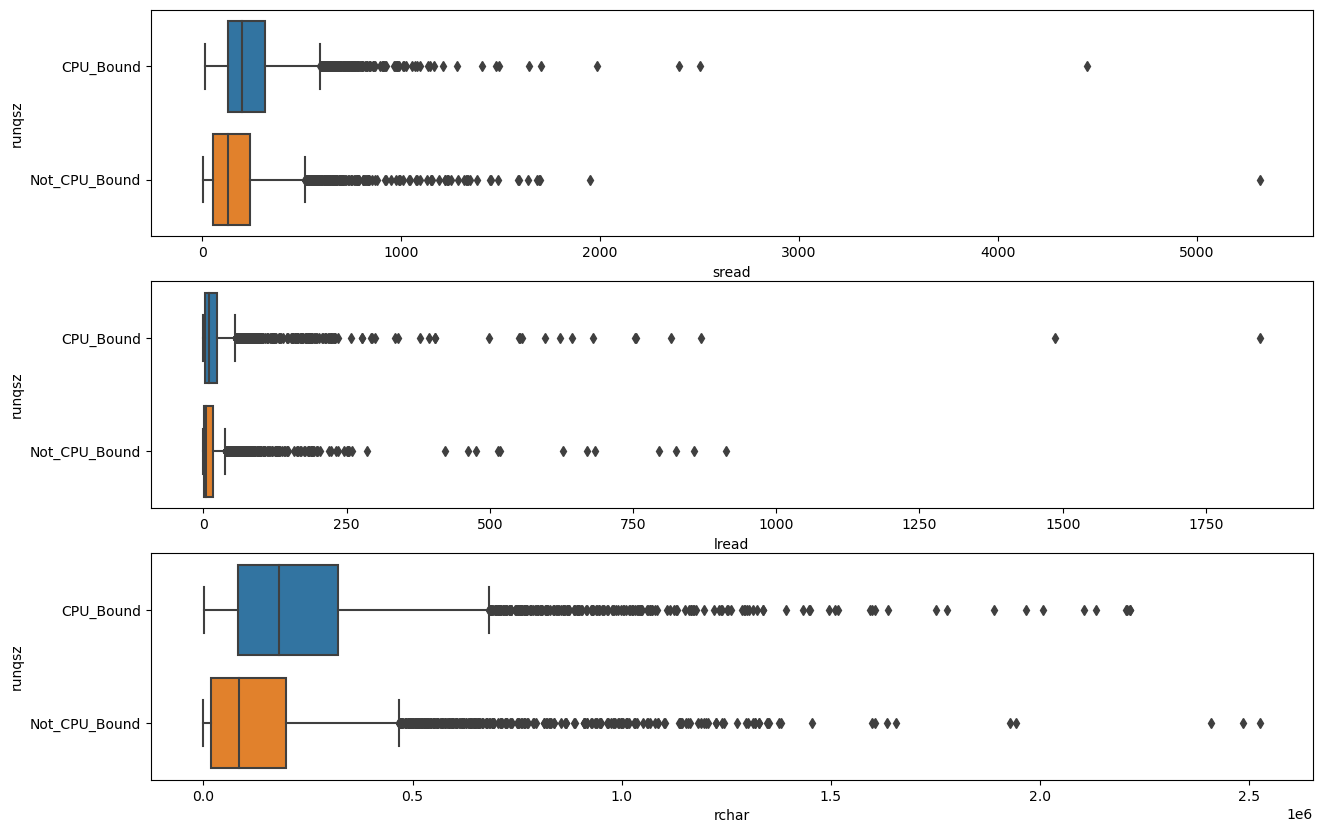

In [32]:
# categorical vs numerical
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
sns.boxplot(data=df, x='sread', y='runqsz', ax=axes[0])
sns.boxplot(data=df, x='lread', y='runqsz', ax=axes[1])
sns.boxplot(data=df, x='rchar', y='runqsz', ax=axes[2])

<Axes: >

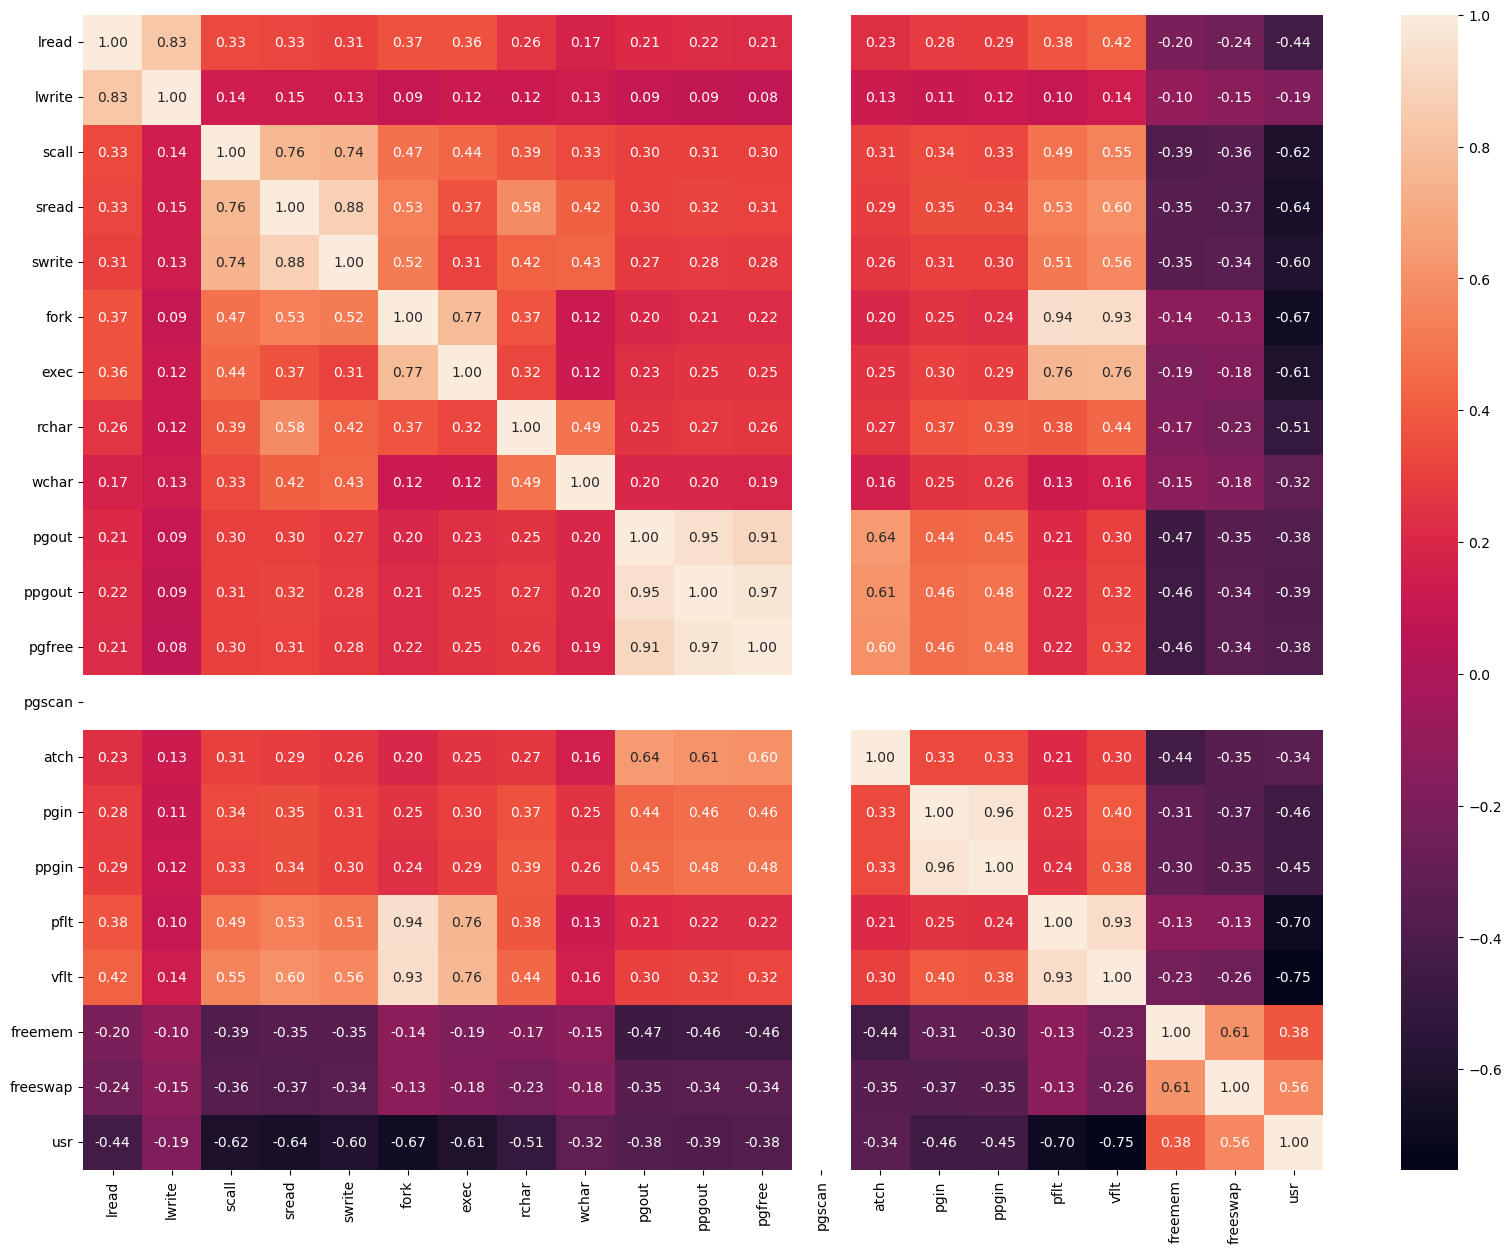

In [33]:
# relation between all numeric variables
plt.figure(figsize=(20,15))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')

In [34]:
df['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [35]:
df['runqsz'].dtype

dtype('O')

## Create dummy variables

In [36]:
df = pd.get_dummies(df, columns=['runqsz'], drop_first=True)
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

## Split Data

In [37]:
# independent variables
X = df.drop('usr',axis=1)
# dependent variables
y= df.pop('usr')

In [38]:
X.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

### We will now split X and y into train and test sets in a 70:30 ratio.

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1 )

In [135]:
# let's add the intercept to data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [136]:
print(X_train.head())

      const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
694     1.0      1       1   1345    223     192   0.6   0.6  198703.0   
5535    1.0      1       1   1429     87      67   0.2   0.2    7163.0   
4244    1.0     49      71   3273    225     180   0.6   0.4   83246.0   
2472    1.0     13       8   4349    300     191   2.8   3.0   96009.0   
7052    1.0     17      23    225     13      13   0.4   1.6   17132.0   

         wchar  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  \
694   293578.0  ...   23.40    56.4  2.60  3.80   7.40   28.20   56.60   
5535   24842.0  ...    0.00     0.0  0.00  1.60   1.60   15.77   30.74   
4244   53705.0  ...    7.19     0.0  2.79  3.99   4.59   59.88   74.05   
2472   70467.0  ...    0.00     0.0  0.00  2.80   3.20  129.00  236.80   
7052   12514.0  ...    0.00     0.0  0.00  0.00   0.00   19.80   23.80   

      freemem  freeswap  runqsz_Not_CPU_Bound  
694       121   1375446                     0  
5535     1476 

In [137]:
print(X_test.head())

      const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
3894    1.0     27      39   1252     53     118   0.2   0.2   26592.0   
4276    1.0      1       0    996     85      55   0.4   0.4   16667.0   
3414    1.0      9       7   1530    247     135   0.4   0.4   14513.0   
4165    1.0     32       4   3243    182     140   5.2   5.6  337517.0   
7385    1.0     16       3   5017    259     249   2.8   1.4   73537.0   

         wchar  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  \
3894   54394.0  ...     0.0     0.0   0.0   0.4    0.6   19.44   20.04   
4276   36431.0  ...     0.0     0.0   0.0   1.0    1.4   35.53   52.10   
3414   61905.0  ...    30.4    24.2  10.4  14.8   18.4   26.80  186.20   
4165   94832.0  ...     1.0     0.0   1.4   4.6    7.0  250.60  420.20   
7385  237547.0  ...     0.0     0.0   0.0   5.6    5.8  142.80  276.20   

      freemem  freeswap  runqsz_Not_CPU_Bound  
3894     7762   1875466                     1  
4276     2979 

## Fit Linear Model

In [138]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [139]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:55:51   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6380 

In [140]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   27.191591
lread                    1.472618
lwrite                   1.405898
scall                    2.414301
sread                    6.836403
swrite                   5.320692
fork                    18.210503
exec                     3.059950
rchar                    1.974726
wchar                    1.553348
pgout                    5.776005
ppgout                  15.906900
pgfree                  20.437584
pgscan                   9.237017
atch                     1.087328
pgin                     8.075699
ppgin                    8.672927
pflt                    11.834374
vflt                    20.233207
freemem                  1.677241
freeswap                 1.761193
runqsz_Not_CPU_Bound     1.118922
dtype: float64



#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [141]:
X_train2 = X_train.drop(["sread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.643 
Adjusted R-squared: 0.642


In [142]:
X_train3 = X_train.drop(['fork'], axis=1)
olsmodel_2 = sm.OLS(y_train,X_train3)
olsres_2 = olsmodel_2.fit()
print("R-Squared;", np.round(olsres_2.rsquared, 3),
     "\nAdjusted r-Squared;", np.round(olsres_2.rsquared_adj,3),
     )

R-Squared; 0.64 
Adjusted r-Squared; 0.638


In [143]:
X_train4 = X_train.drop('ppgout', axis =1)
olsmodel_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmodel_3.fit()
print("The R-sqared:", np.round(olsres_3.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_3.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [144]:
X_train5 = X_train.drop('pgfree', axis =1)
olsmodel_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmodel_4.fit()
print("The R-sqared:", np.round(olsres_4.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_4.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [145]:
X_train6 = X_train.drop('pgscan', axis =1)
olsmodel_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmodel_5.fit()
print("The R-sqared:", np.round(olsres_5.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_5.rsquared_adj,3),
     )

The R-sqared: 0.643 
The adj-R-squared: 0.641


In [146]:
X_train7 = X_train.drop('pgin', axis =1)
olsmodel_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmodel_6.fit()
print("The R-sqared:", np.round(olsres_6.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_6.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [147]:
X_train8 = X_train.drop('ppgin', axis =1)
olsmodel_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmodel_7.fit()
print("The R-sqared:", np.round(olsres_7.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_7.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [148]:
X_train9 = X_train.drop('pflt', axis =1)
olsmodel_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmodel_8.fit()
print("The R-sqared:", np.round(olsres_8.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_8.rsquared_adj,3),
     )

The R-sqared: 0.637 
The adj-R-squared: 0.636


In [149]:
X_train10 = X_train.drop('vflt', axis =1)
olsmodel_9 = sm.OLS(y_train, X_train10)
olsres_9 = olsmodel_9.fit()
print("The R-sqared:", np.round(olsres_9.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_9.rsquared_adj,3),
     )

The R-sqared: 0.64 
The adj-R-squared: 0.639


In [150]:
X_train12 = X_train.drop('pgout', axis =1)
olsmodel_11 = sm.OLS(y_train, X_train12)
olsres_11 = olsmodel_11.fit()
print("The R-sqared:", np.round(olsres_11.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_11.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


Since there is no effect on adj. R-squared after dropping the 'sread' and 'swrite' column, we can remove it from the training set.

In [151]:
X_train = X_train.drop(["sread"], axis=1)

In [152]:
olsmodel_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmodel_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     514.1
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:02   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5713   BIC:                         4.376e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6332 

Let's check if multicollinearity is still present in the data.

In [153]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   27.174347
lread                    1.471386
lwrite                   1.404635
scall                    2.222958
swrite                   1.967787
fork                    18.117240
exec                     3.057619
rchar                    1.677330
wchar                    1.546441
pgout                    5.749955
ppgout                  15.766171
pgfree                  20.397407
pgscan                   9.235295
atch                     1.086597
pgin                     8.070586
ppgin                    8.672913
pflt                    11.832565
vflt                    20.097655
freemem                  1.676978
freeswap                 1.756301
runqsz_Not_CPU_Bound     1.118913
dtype: float64



In [154]:
X_train13 = X_train.drop(["fork"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [155]:
X_train14 = X_train.drop(['pgout'], axis=1)
olsmodel_14 = sm.OLS(y_train,X_train14)
olsres_14 = olsmodel_14.fit()
print("R-Squared;", np.round(olsres_14.rsquared, 3),
     "\nAdjusted r-Squared;", np.round(olsres_14.rsquared_adj,3),
     )

R-Squared; 0.642 
Adjusted r-Squared; 0.641


In [156]:
X_train15 = X_train.drop('ppgout', axis =1)
olsmodel_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmodel_15.fit()
print("The R-sqared:", np.round(olsres_15.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_15.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [157]:
X_train16 = X_train.drop('pgfree', axis =1)
olsmodel_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmodel_16.fit()
print("The R-sqared:", np.round(olsres_16.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_16.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [158]:
X_train17 = X_train.drop('pgscan', axis =1)
olsmodel_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmodel_17.fit()
print("The R-sqared:", np.round(olsres_17.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_17.rsquared_adj,3),
     )

The R-sqared: 0.643 
The adj-R-squared: 0.642


In [159]:
X_train18 = X_train.drop('pgin', axis =1)
olsmodel_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmodel_18.fit()
print("The R-sqared:", np.round(olsres_18.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_18.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [160]:
X_train19 = X_train.drop('ppgin', axis =1)
olsmodel_19 = sm.OLS(y_train, X_train19)
olsres_19 = olsmodel_19.fit()
print("The R-sqared:", np.round(olsres_19.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_19.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [161]:
X_train20= X_train.drop('pflt', axis =1)
olsmodel_20 = sm.OLS(y_train, X_train20)
olsres_20 = olsmodel_20.fit()
print("The R-sqared:", np.round(olsres_20.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_20.rsquared_adj,3),
     )

The R-sqared: 0.637 
The adj-R-squared: 0.636


In [162]:
X_train21 = X_train.drop('vflt', axis =1)
olsmodel_21 = sm.OLS(y_train, X_train21)
olsres_21 = olsmodel_21.fit()
print("The R-sqared:", np.round(olsres_21.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_21.rsquared_adj,3),
     )

The R-sqared: 0.64 
The adj-R-squared: 0.639


In [163]:
X_train = X_train.drop(["pgscan"], axis=1)

In [164]:
olsmodel_23 = sm.OLS(y_train, X_train)
olsres_23 = olsmodel_23.fit()
print(olsres_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     541.0
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:09   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5714   BIC:                         4.375e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6696 

In [165]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   27.139246
lread                    1.465604
lwrite                   1.404635
scall                    2.222143
swrite                   1.967648
fork                    18.094680
exec                     3.057568
rchar                    1.677329
wchar                    1.542281
pgout                    5.272032
ppgout                  15.734505
pgfree                   8.812404
atch                     1.086588
pgin                     8.015164
ppgin                    8.526514
pflt                    11.832541
vflt                    20.080731
freemem                  1.676811
freeswap                 1.753727
runqsz_Not_CPU_Bound     1.118908
dtype: float64



In [166]:
X_train23 = X_train.drop(["fork"], axis=1)
olsmod_24 = sm.OLS(y_train, X_train23)
olsres_24 = olsmod_24.fit()
print(
    "R-squared:",
    np.round(olsres_24.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_24.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [167]:
X_train24 = X_train.drop('ppgout', axis =1)
olsmodel_25 = sm.OLS(y_train, X_train24)
olsres_25 = olsmodel_25.fit()
print("The R-sqared:", np.round(olsres_25.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_25.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [168]:
X_train25= X_train.drop('pgfree', axis =1)
olsmodel_26 = sm.OLS(y_train, X_train25)
olsres_26 = olsmodel_26.fit()
print("The R-sqared:", np.round(olsres_26.rsquared,3),
     "\nThe adj-R-squared:", np.round(olsres_26.rsquared_adj,3),
     )

The R-sqared: 0.642 
The adj-R-squared: 0.641


In [169]:
X_train26 = X_train.drop(["pgin"], axis=1)
olsmod_27 = sm.OLS(y_train, X_train26)
olsres_27 = olsmod_27.fit()
print(
    "R-squared:",
    np.round(olsres_27.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_27.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [170]:
X_train27 = X_train.drop(["ppgin"], axis=1)
olsmod_28 = sm.OLS(y_train, X_train27)
olsres_28 = olsmod_28.fit()
print(
    "R-squared:",
    np.round(olsres_28.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_28.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [171]:
X_train28 = X_train.drop(["pflt"], axis=1)
olsmod_29 = sm.OLS(y_train, X_train28)
olsres_29 = olsmod_29.fit()
print(
    "R-squared:",
    np.round(olsres_29.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_29.rsquared_adj, 3),
)

R-squared: 0.637 
Adjusted R-squared: 0.636


In [172]:
X_train29 = X_train.drop(["vflt"], axis=1)
olsmod_30 = sm.OLS(y_train, X_train29)
olsres_30 = olsmod_30.fit()
print(
    "R-squared:",
    np.round(olsres_30.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_30.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.639


In [173]:
X_train30 = X_train.drop(["pgout"], axis=1)
olsmod_31 = sm.OLS(y_train, X_train30)
olsres_31 = olsmod_31.fit()
print(
    "R-squared:",
    np.round(olsres_31.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_31.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [174]:
X_train = X_train.drop(["ppgout"], axis=1)

In [175]:
olsmodel_32 = sm.OLS(y_train, X_train)
olsres_32 = olsmodel_32.fit()
print(olsres_32.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     570.1
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:15   Log-Likelihood:                -21792.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5715   BIC:                         4.375e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.5039 

In [176]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   26.945472
lread                    1.442433
lwrite                   1.404362
scall                    2.222086
swrite                   1.966110
fork                    18.093635
exec                     3.049026
rchar                    1.676608
wchar                    1.539560
pgout                    2.334938
pgfree                   3.151135
atch                     1.083390
pgin                     7.958579
ppgin                    8.473102
pflt                    11.829255
vflt                    20.080461
freemem                  1.676062
freeswap                 1.747126
runqsz_Not_CPU_Bound     1.118907
dtype: float64



In [177]:
X_train31 = X_train.drop(["fork"], axis=1)
olsmod_33 = sm.OLS(y_train, X_train31)
olsres_33 = olsmod_33.fit()
print(
    "R-squared:",
    np.round(olsres_33.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_33.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [178]:
X_train32 = X_train.drop(["pgin"], axis=1)
olsmod_34 = sm.OLS(y_train, X_train32)
olsres_34 = olsmod_34.fit()
print(
    "R-squared:",
    np.round(olsres_34.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_34.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [179]:
X_train33 = X_train.drop(["ppgin"], axis=1)
olsmod_35 = sm.OLS(y_train, X_train33)
olsres_35 = olsmod_35.fit()
print(
    "R-squared:",
    np.round(olsres_35.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_35.rsquared_adj, 3),
)

R-squared: 0.642 
Adjusted R-squared: 0.641


In [180]:
X_train34 = X_train.drop(["vflt"], axis=1)
olsmod_36 = sm.OLS(y_train, X_train34)
olsres_36 = olsmod_36.fit()
print(
    "R-squared:",
    np.round(olsres_36.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_36.rsquared_adj, 3),
)

R-squared: 0.64 
Adjusted R-squared: 0.638


In [181]:
X_train35 = X_train.drop(["pflt"], axis=1)
olsmod_37 = sm.OLS(y_train, X_train35)
olsres_37 = olsmod_37.fit()
print(
    "R-squared:",
    np.round(olsres_37.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_37.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [182]:
X_train = X_train.drop(["ppgin"], axis=1)

In [183]:
olsmod_38 = sm.OLS(y_train, X_train)
olsres_38 = olsmod_38.fit()
print(olsres_38.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     602.5
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:20   Log-Likelihood:                -21796.
No. Observations:                5734   AIC:                         4.363e+04
Df Residuals:                    5716   BIC:                         4.375e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.5263 

In [184]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   26.942306
lread                    1.438137
lwrite                   1.402788
scall                    2.222072
swrite                   1.966084
fork                    18.051199
exec                     3.048941
rchar                    1.622060
wchar                    1.539466
pgout                    2.322767
pgfree                   2.869506
atch                     1.083366
pgin                     1.703717
pflt                    11.782277
vflt                    19.730246
freemem                  1.676037
freeswap                 1.747124
runqsz_Not_CPU_Bound     1.117704
dtype: float64



In [185]:
X_train36 = X_train.drop(["fork"], axis=1)
olsmod_39 = sm.OLS(y_train, X_train36)
olsres_39 = olsmod_39.fit()
print(
    "R-squared:",
    np.round(olsres_39.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_39.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [186]:
X_train37 = X_train.drop(["pflt"], axis=1)
olsmod_40 = sm.OLS(y_train, X_train37)
olsres_40 = olsmod_40.fit()
print(
    "R-squared:",
    np.round(olsres_40.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_40.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.635


In [187]:
X_train38 = X_train.drop(["vflt"], axis=1)
olsmod_41 = sm.OLS(y_train, X_train38)
olsres_41 = olsmod_41.fit()
print(
    "R-squared:",
    np.round(olsres_41.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_41.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.638


In [188]:
X_train = X_train.drop(["fork"], axis=1)

In [189]:
olsmod_42 = sm.OLS(y_train, X_train)
olsres_42 = olsmod_42.fit()
print(olsres_42.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     631.3
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:25   Log-Likelihood:                -21821.
No. Observations:                5734   AIC:                         4.368e+04
Df Residuals:                    5717   BIC:                         4.379e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.6146 

In [190]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   25.817261
lread                    1.428970
lwrite                   1.393491
scall                    2.159167
swrite                   1.885821
exec                     2.150088
rchar                    1.619174
wchar                    1.539460
pgout                    2.320954
pgfree                   2.824334
atch                     1.076954
pgin                     1.640613
pflt                    10.450166
vflt                    13.579446
freemem                  1.676027
freeswap                 1.708493
runqsz_Not_CPU_Bound     1.117225
dtype: float64



In [191]:
X_train39 = X_train.drop(["vflt"], axis=1)
olsmod_43 = sm.OLS(y_train, X_train39)
olsres_43 = olsmod_43.fit()
print(
    "R-squared:",
    np.round(olsres_43.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_43.rsquared_adj, 3),
)

R-squared: 0.638 
Adjusted R-squared: 0.637


In [192]:
X_train40 = X_train.drop(["pflt"], axis=1)
olsmod_44 = sm.OLS(y_train, X_train40)
olsres_44 = olsmod_44.fit()
print(
    "R-squared:",
    np.round(olsres_44.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_44.rsquared_adj, 3),
)

R-squared: 0.628 
Adjusted R-squared: 0.627


In [193]:
X_train = X_train.drop(["vflt"], axis=1)

In [194]:
olsmod_45 = sm.OLS(y_train, X_train)
olsres_45 = olsmod_45.fit()
print(olsres_45.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     671.1
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:28   Log-Likelihood:                -21828.
No. Observations:                5734   AIC:                         4.369e+04
Df Residuals:                    5718   BIC:                         4.379e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.9940 

In [195]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   25.301809
lread                    1.428892
lwrite                   1.391261
scall                    2.142416
swrite                   1.866997
exec                     1.885393
rchar                    1.602251
wchar                    1.516248
pgout                    2.313369
pgfree                   2.730511
atch                     1.062284
pgin                     1.580404
pflt                     2.327540
freemem                  1.676020
freeswap                 1.654054
runqsz_Not_CPU_Bound     1.117147
dtype: float64



All features have VIF value <3

## Assumptions of Linear Regression

In [219]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_50.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_50.resid.values  # residuals

df_pred.head()



Actual Values  Fitted Values  Residuals
0             91      95.050641  -4.050641
1             94      94.596232  -0.596232
2              0       3.871835  -3.871835
3             83      79.334276   3.665724
4             94      95.181988  -1.181988

## TEST FOR LINEARITY AND INDEPENDENCE
Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
How to check linearity?

Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.
How to fix if this assumption is not followed?

We can try different transformations.

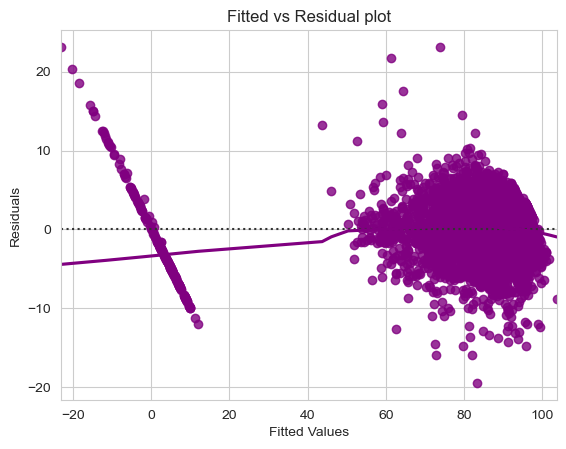

In [220]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### It is not showing any pattern. hence we will not be performing transformation operation here.

## TEST FOR NORMALITY
What is the test?

Error terms/residuals should be normally distributed.

If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

What does non-normality indicate?

It suggests that there are a few unusual data points which must be studied closely to make a better model.
How to check the Normality?

It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

Another test to check for normality is the Shapiro-Wilk test.

How to Make residuals normal?

We can apply transformations like log, exponential, arcsinh, etc as per our data.

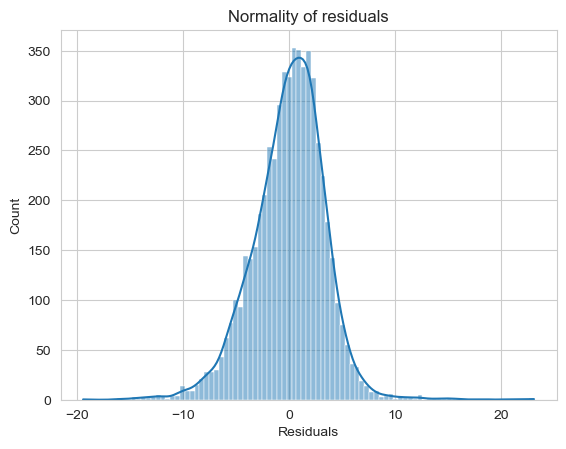

In [221]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

### The plot is slightly left skewed.

## The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

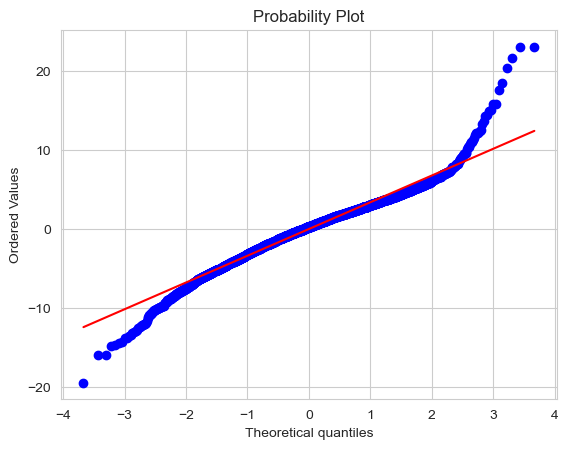

In [222]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Few of the points are lying on the straight line in QQ plot.

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.

In [223]:
stats.shapiro(df_pred["Residuals"])

C:\Users\subra\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9718454480171204, pvalue=3.901638548048743e-32)

Since p-value > 0.05, the residuals are  normal as per shapiro test.
As an approximation, we might be willing to accept this distribution as close to being normal.

## TEST FOR HOMOSCEDASTICITY

Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Why the test?

The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
How to check if model has Heteroscedasticity?

Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.
How to deal with Heteroscedasticity?

Can be fixed via adding other important features or making transformations.
The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

In [201]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [202]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train40)
lzip(name, test)

[('F statistic', 1.1203820064407923), ('p-value', 0.0012082696863287262)]

In [203]:
# columns in training set
X_train40.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'pgfree', 'atch', 'pgin', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

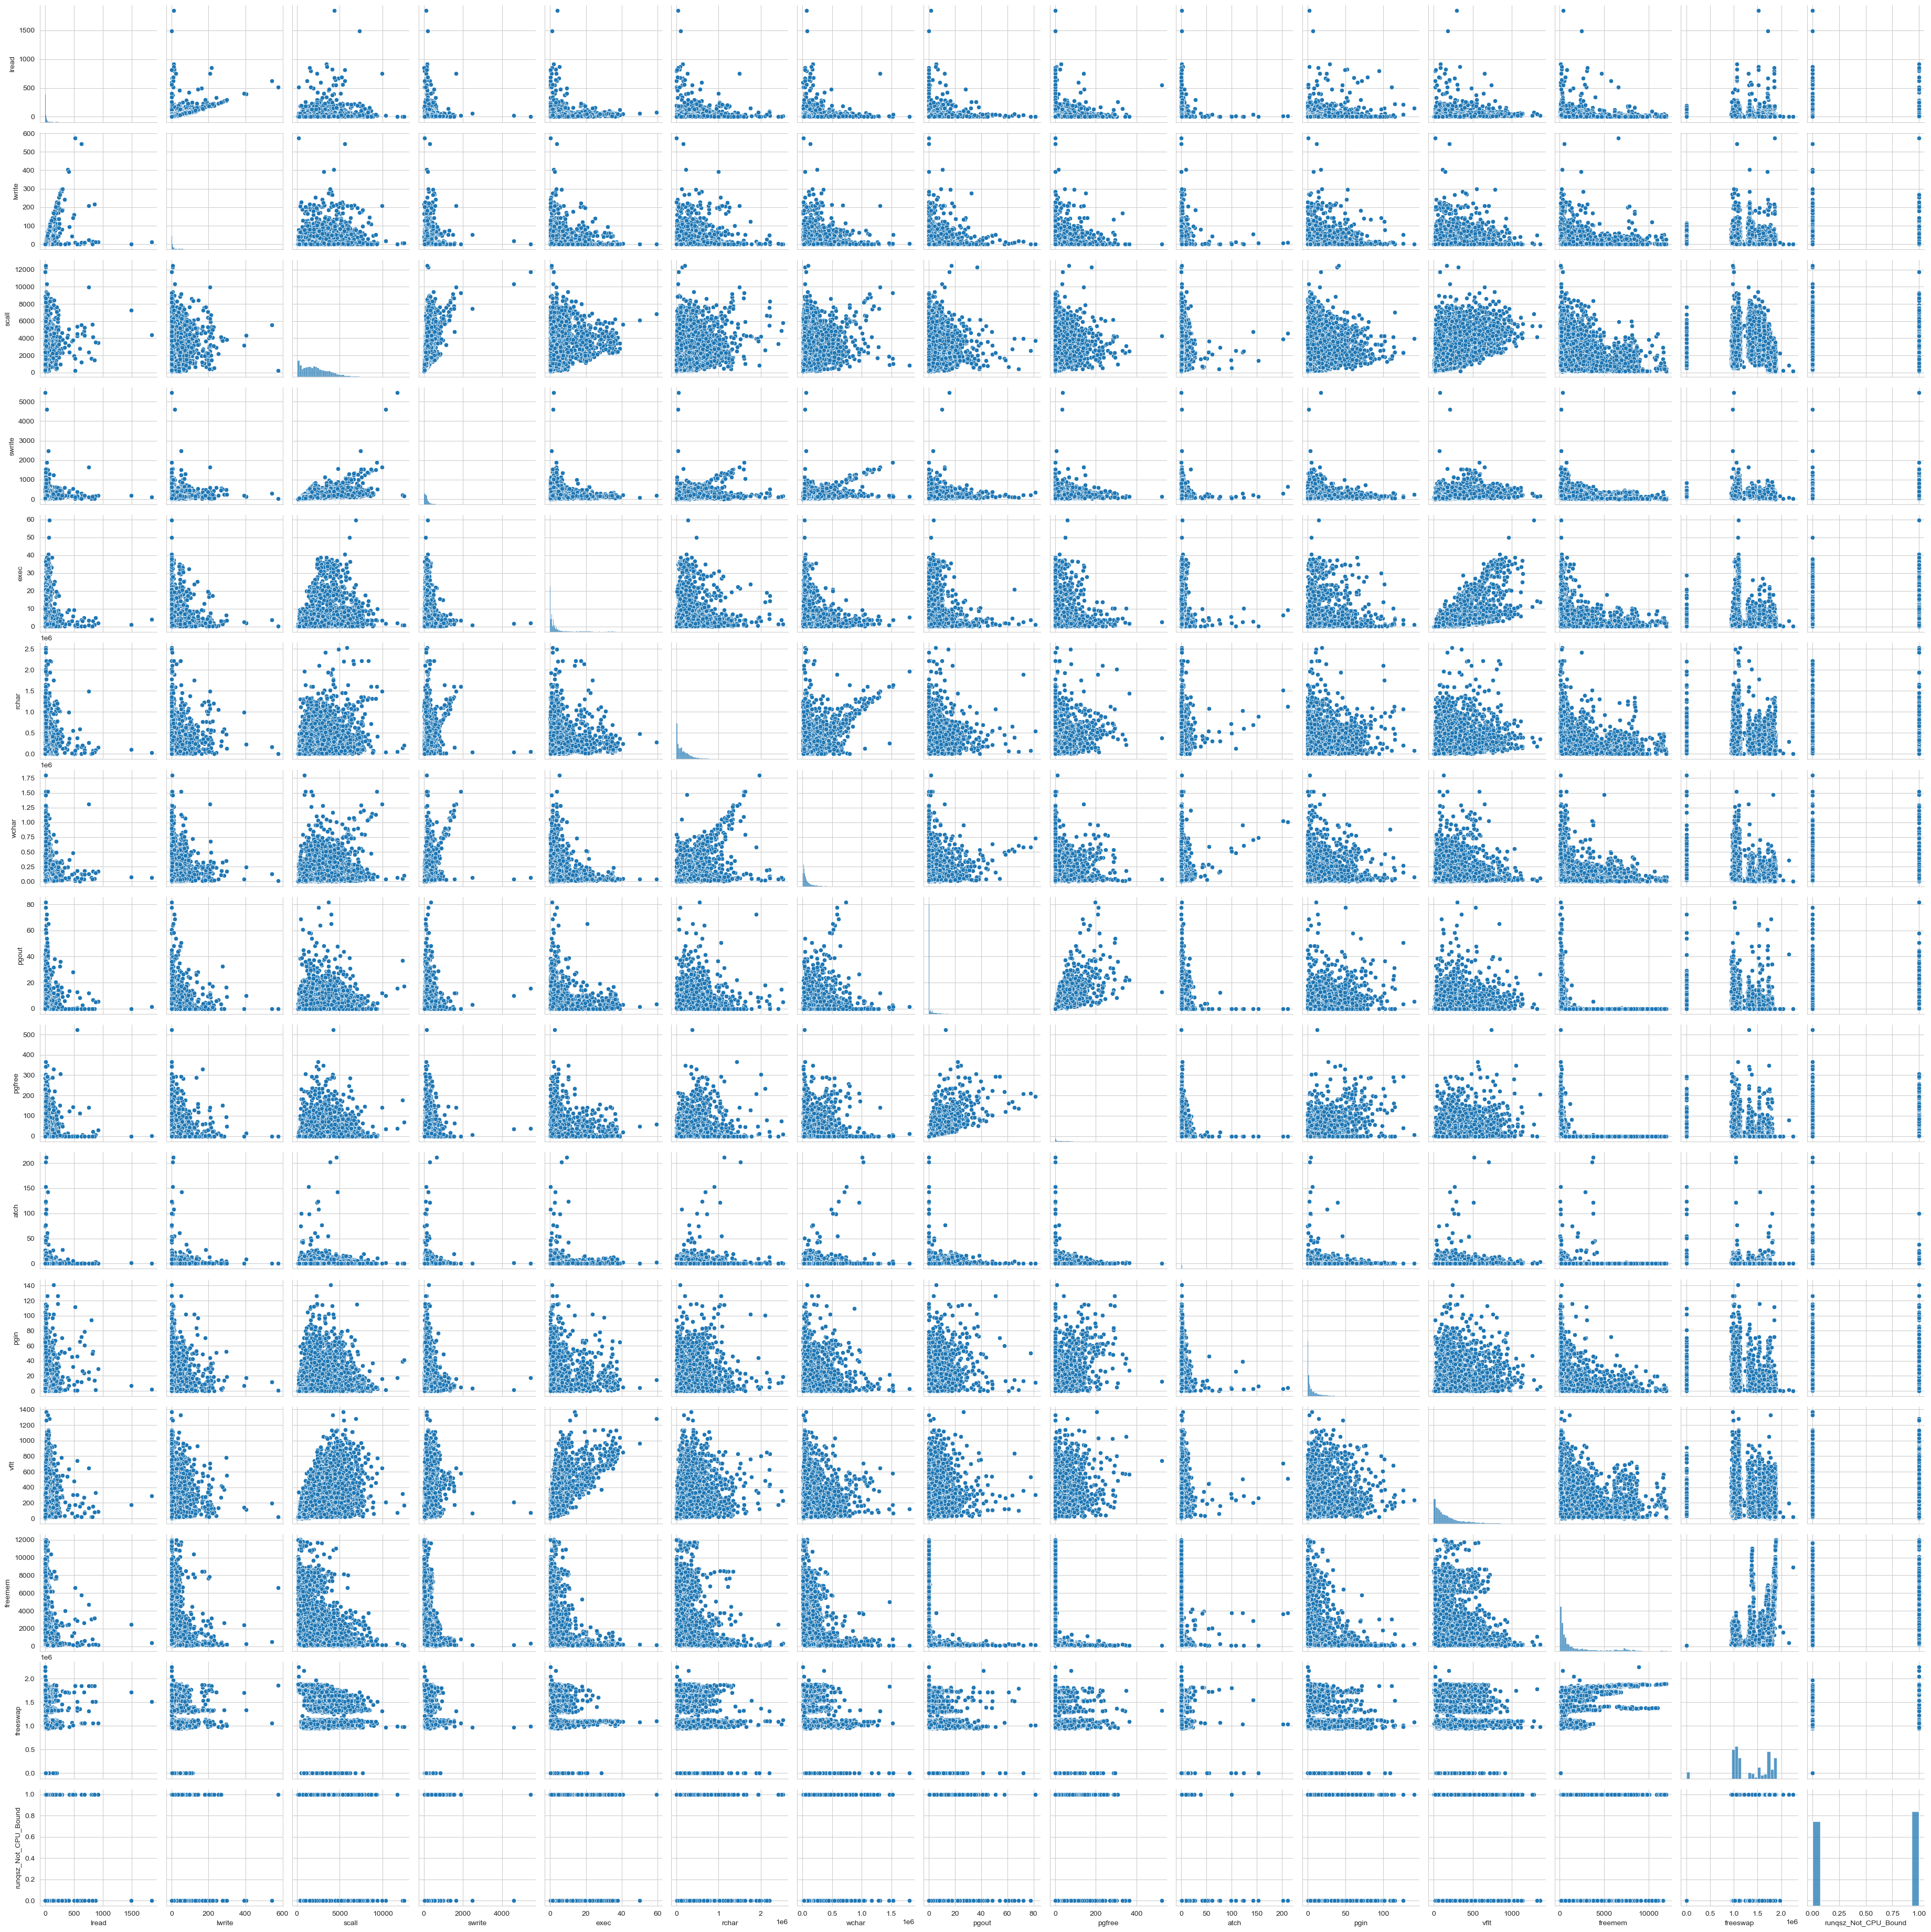

In [124]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(df[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'pgfree', 'atch', 'pgin', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound']])
plt.show()

In [204]:
# using square transformation
X_train40["freeswap_sq"] = np.square(X_train40["freeswap"])

# let's create a model with the transformed data
olsmod_50 = sm.OLS(y_train, X_train40)
olsres_50 = olsmod_50.fit()
print(olsres_50.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     9549.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:57:26   Log-Likelihood:                -15214.
No. Observations:                5734   AIC:                         3.046e+04
Df Residuals:                    5717   BIC:                         3.058e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.8770 

In [205]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train40)
lzip(name, test)

[('F statistic', 1.0145945866695996), ('p-value', 0.3494825661007973)]

The P value is greater than 0.05 hence the residuals are homoscedastic.

In [212]:
print(olsres_50.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     9549.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:04:08   Log-Likelihood:                -15214.
No. Observations:                5734   AIC:                         3.046e+04
Df Residuals:                    5717   BIC:                         3.058e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.8770 

## Predictions

In [133]:
# let's check the model parameters
olsres_50.params

const                   1.387265e+01
lread                  -9.433174e-03
lwrite                 -4.684806e-03
scall                  -1.984157e-03
swrite                 -1.827653e-03
exec                   -3.366683e-01
rchar                  -1.248302e-06
wchar                  -4.922668e-06
pgout                  -2.373899e-02
pgfree                 -6.277765e-03
atch                    1.555257e-02
pgin                   -5.771292e-02
vflt                   -2.160753e-02
freemem                 6.946097e-04
freeswap                1.272636e-04
runqsz_Not_CPU_Bound    1.864810e+00
lread_sq               -2.030707e-06
freeswap_sq            -4.623125e-11
dtype: float64

In [206]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train40.columns)):
    if i == 0:
        print(olsres_50.params[i], "+", end=" ")
    elif i != len(X_train40.columns) - 1:
        print(
            olsres_50.params[i],
            "* (",
            X_train40.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_50.params[i], "* (", X_train40.columns[i], ")")

usr = 13.87704181325071 + -0.011539814453154796 * ( lread ) +  -0.0031287198206714426 * ( lwrite ) +  -0.0019833547009546204 * ( scall ) +  -0.0018177900781495213 * ( swrite ) +  -0.33582150503431696 * ( exec ) +  -1.2475911941737436e-06 * ( rchar ) +  -4.922359043197979e-06 * ( wchar ) +  -0.023684172733254558 * ( pgout ) +  -0.006315744294497376 * ( pgfree ) +  0.01550951818904095 * ( atch ) +  -0.0571324104859776 * ( pgin ) +  -0.02157824897176316 * ( vflt ) +  0.00069486878396285 * ( freemem ) +  0.0001272527125047064 * ( freeswap ) +  1.8630417754721984 * ( runqsz_Not_CPU_Bound ) +  -4.622657406683585e-11 * ( freeswap_sq )


## We can now use the model for making predictions on the test data.

In [207]:
X_train40.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'pgfree', 'atch', 'pgin', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound', 'freeswap_sq'],
      dtype='object')

In [208]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [209]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["sread","fork","ppgout","pgscan","ppgin","vflt"], axis=1
)

In [213]:
# transforming the freeswap column in the test data corresponding to the training set
X_test2["freeswap_sq"] = np.square(X_test2["freeswap"])

In [224]:
# let's make predictions on the test set
y_pred = olsres_50.predict(X_test2)

In [225]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

4.13287986292188

In [226]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

3.173022580986893

In [227]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

3.436214801640286

In [228]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

2.5989054581243063

## Actionable insights and recommendation

R-squared of the model is 0.964 and adjusted R-squared is 0.964, which shows that the model is able to explain ~96% variance in the data. This is quite good.

A unit increase in the atch  will result in a 0.0155 unit increase in the usr, all other variables remaining constant.

The usr of runqsz_Not_CPU_Bound will be 1.8630 units higher than runqsz_Not_CPU not bound.

When rchar and wchar decrease then usr decreases by a factor of -4.922e-06 and 1.248e-06

The MAE on train data is 2 and on test its 3.That means we have reduced the no of errors.

The RMSE on train data is 3 and on test its 3.

### Problem - 2
Objective
In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.
Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.
Data Description
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [6]:
data_df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [7]:
data_df

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1473 rows x 10 columns]

In [8]:
data_df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


The dataset has 10 columns with 2 float 1 int and 7 object datatypes.

In [10]:
data_df.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [11]:
data_df.shape

(1473, 10)

The shape of the dataset is 1473 rows and 10 columns.

In [12]:
data_df.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [13]:
data_df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Wife_age and No_of_childer_born has null values.

In [14]:
data_df.duplicated().sum()

80

80 duplicate records

## Treat Bad data

In [15]:
data_df['Wife_age'].unique()

array([24., 45., 43., 42., 36., 19., 38., 21., 27., 44., 26., 48., 39.,
       37., 46., 40., 29., 31., 33., 25., 28., 47., 32., 49., 34., 20.,
       22., 30., 23., 35., 41., 17., 18., 16., nan])

<Axes: xlabel='Wife_age'>

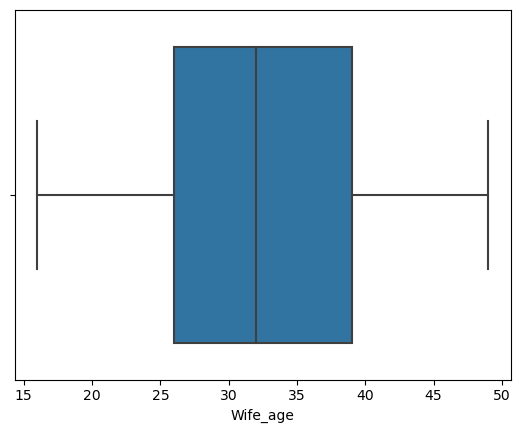

In [16]:
sns.boxplot(data=data_df, x= 'Wife_age')

In [17]:
data_df['Wife_age'].describe()

count    1402.000000
mean       32.606277
std         8.274927
min        16.000000
25%        26.000000
50%        32.000000
75%        39.000000
max        49.000000
Name: Wife_age, dtype: float64

In [18]:
data_df['Wife_age'] = data_df['Wife_age'].fillna(data_df['Wife_age'].mean())

In [19]:
data_df['No_of_children_born'].unique()

array([ 3., 10.,  7.,  9.,  8.,  0.,  6.,  1.,  2.,  4.,  5., 12., 11.,
       13., 16., nan])

<Axes: xlabel='No_of_children_born'>

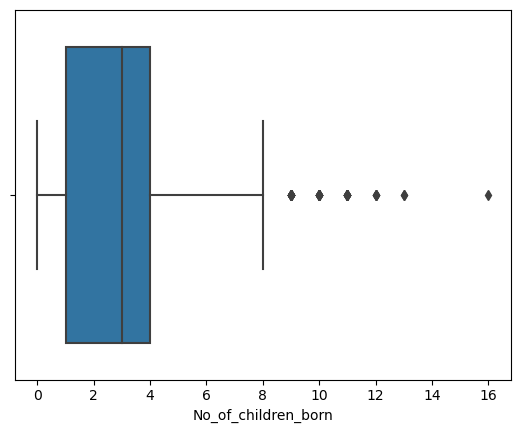

In [20]:
sns.boxplot(x='No_of_children_born', data=data_df)

In [21]:
data_df['No_of_children_born'] = data_df['No_of_children_born'].fillna(data_df['No_of_children_born'].median())

In [22]:
data_df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

Imputed with mean and median for Wife_age and No_of_children_born

## Drop the duplicates

In [23]:
data_df.drop_duplicates(inplace=True)

In [24]:
data_df.duplicated().sum()

0

In [25]:
data_df_num = data_df.select_dtypes(['float64','int64'])
data_df_cat = data_df.select_dtypes(['object'])

In [26]:
data_df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wife_age             1391 non-null   float64
 1   No_of_children_born  1391 non-null   float64
 2   Husband_Occupation   1391 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 43.5 KB


In [27]:
data_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Wife_ education            1391 non-null   object
 1   Husband_education          1391 non-null   object
 2   Wife_religion              1391 non-null   object
 3   Wife_Working               1391 non-null   object
 4   Standard_of_living_index   1391 non-null   object
 5   Media_exposure             1391 non-null   object
 6   Contraceptive_method_used  1391 non-null   object
dtypes: object(7)
memory usage: 86.9+ KB


## Univariant Analysis

Wife_age


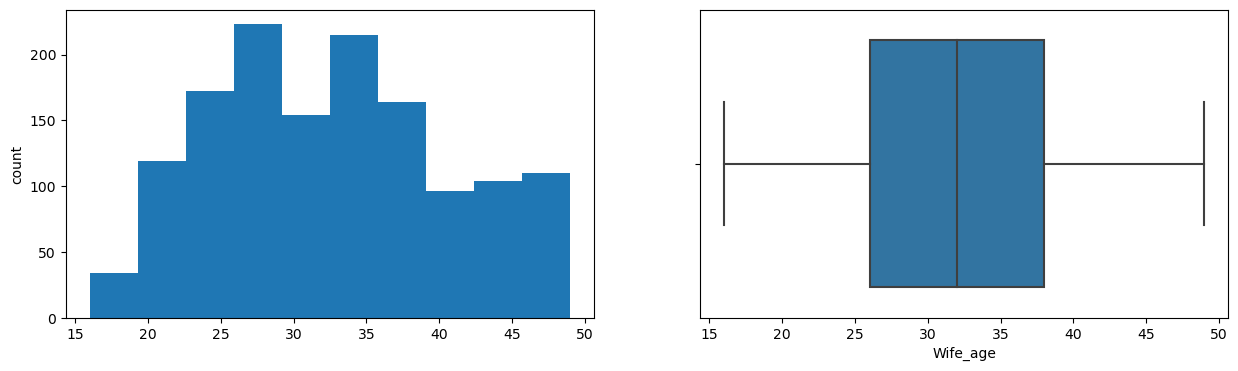

No_of_children_born


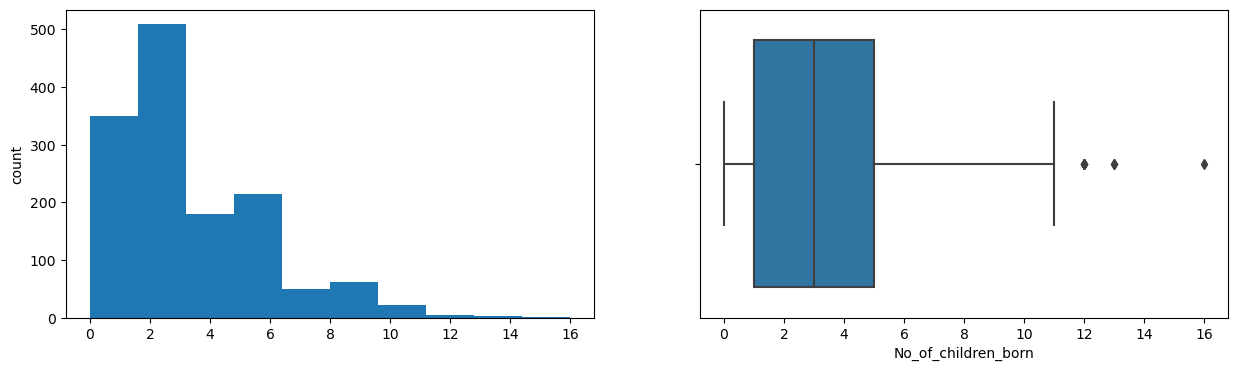

Husband_Occupation


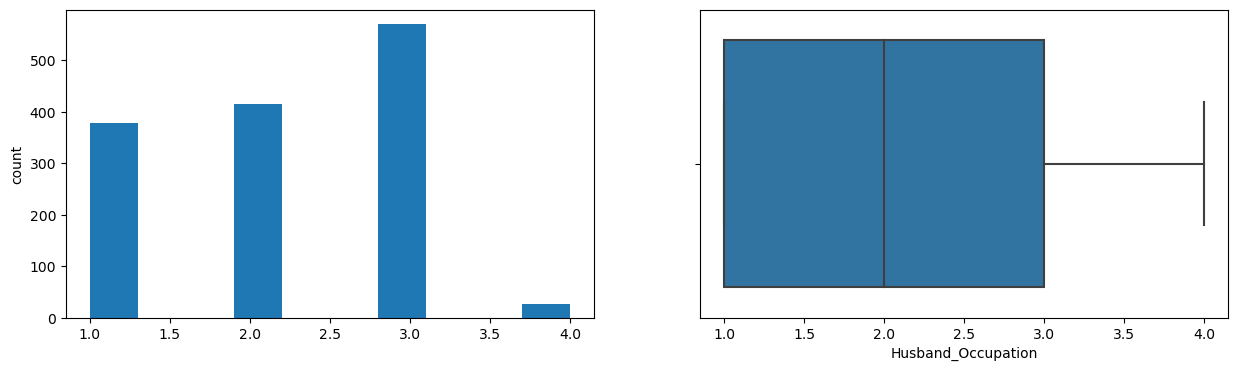

In [28]:
for col in data_df_num.columns[:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(x=data_df_num[col], bins=10)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_df_num[col])
    plt.show()

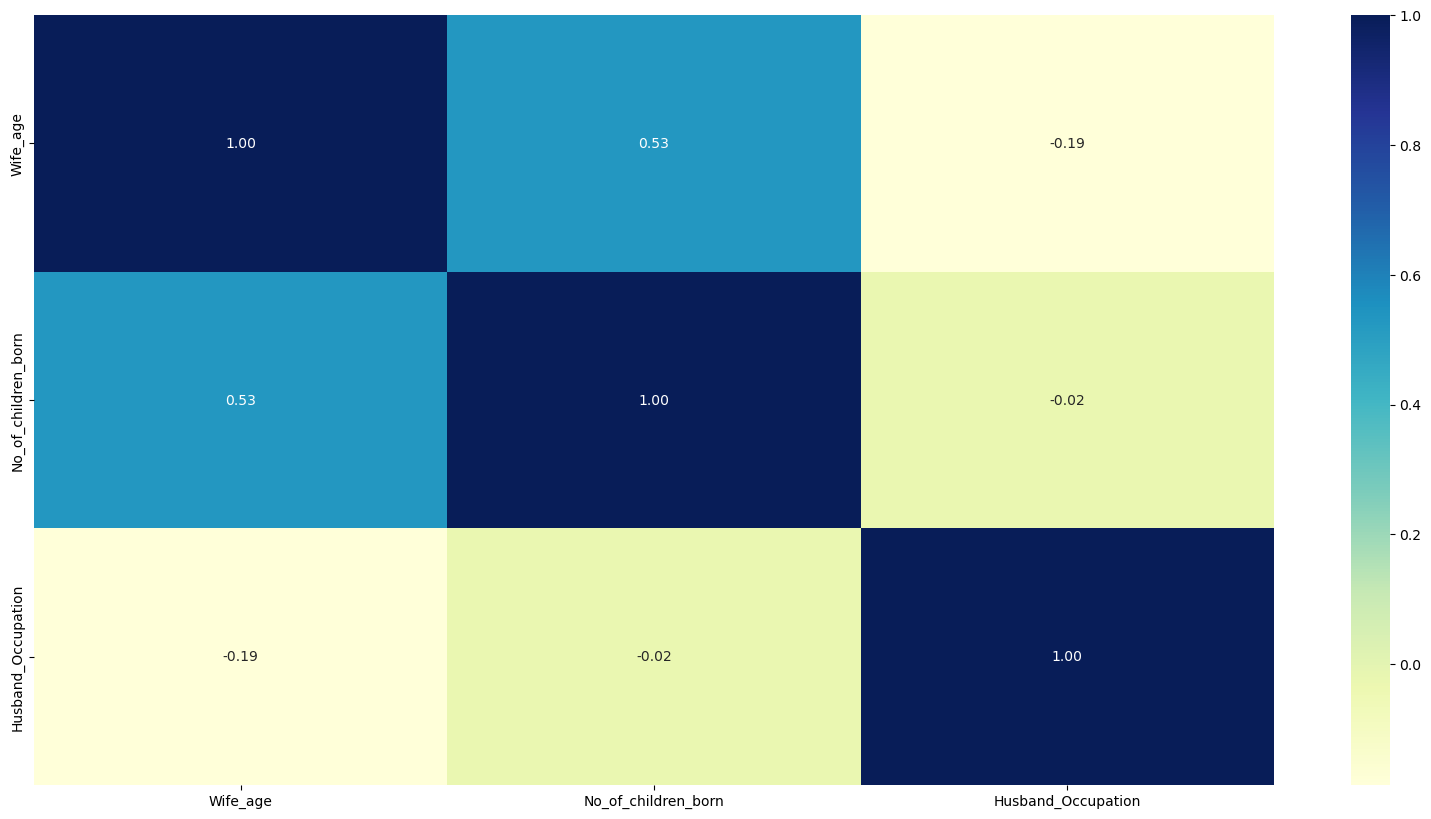

In [29]:
plt.figure(figsize  = (20,10))
sns.heatmap(data_df_num.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

From the correlation plot, we can see that various attributes of the car are highly correlated to each other. Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

## Outlier treatment

In [30]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range 8.0 and upper range 56.0


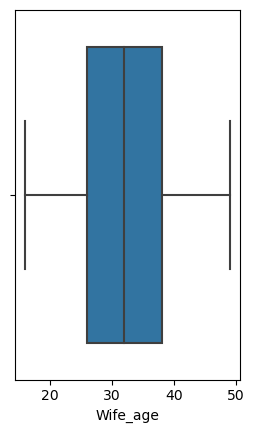

lower range -5.0 and upper range 11.0


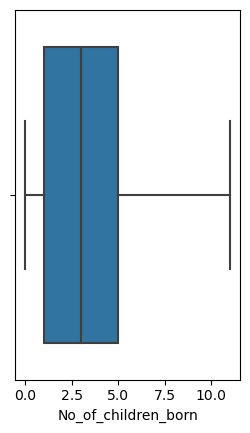

lower range -2.0 and upper range 6.0


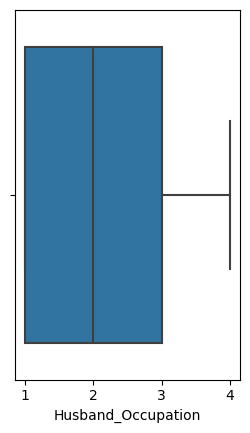

In [31]:
for col in data_df_num[:]:
    #data_df_num['col_1'] = data_df_num[col]
    lr, ur = remove_outliers(data_df_num[col])
    print("lower range",lr, "and upper range", ur)
    data_df_num[col] = np.where(data_df_num[col]> ur,ur,data_df_num[col])
    data_df_num[col] = np.where(data_df_num[col]<lr,lr,data_df_num[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=data_df_num[col])
    plt.show()

After the box plot technique of outlier treatment, the outliers are removed. It uses a technique of lower index and upper index for eliminating the outliers

## Univariant analysis for Categorical variable  

Wife_ education


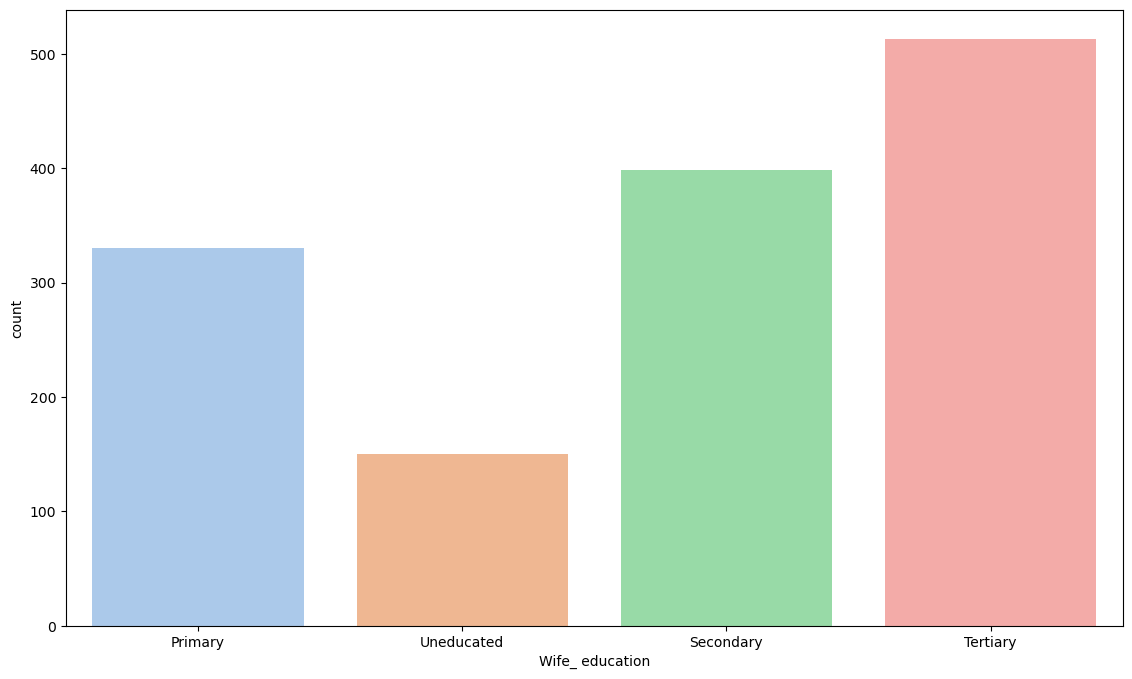

Husband_education


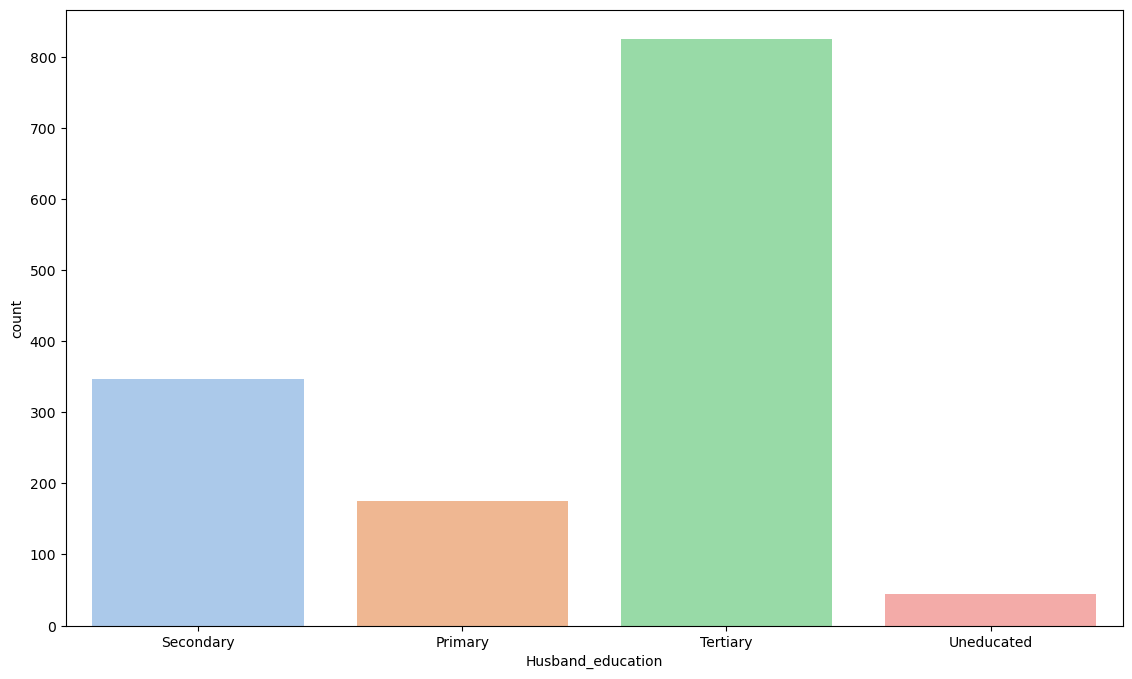

Wife_religion


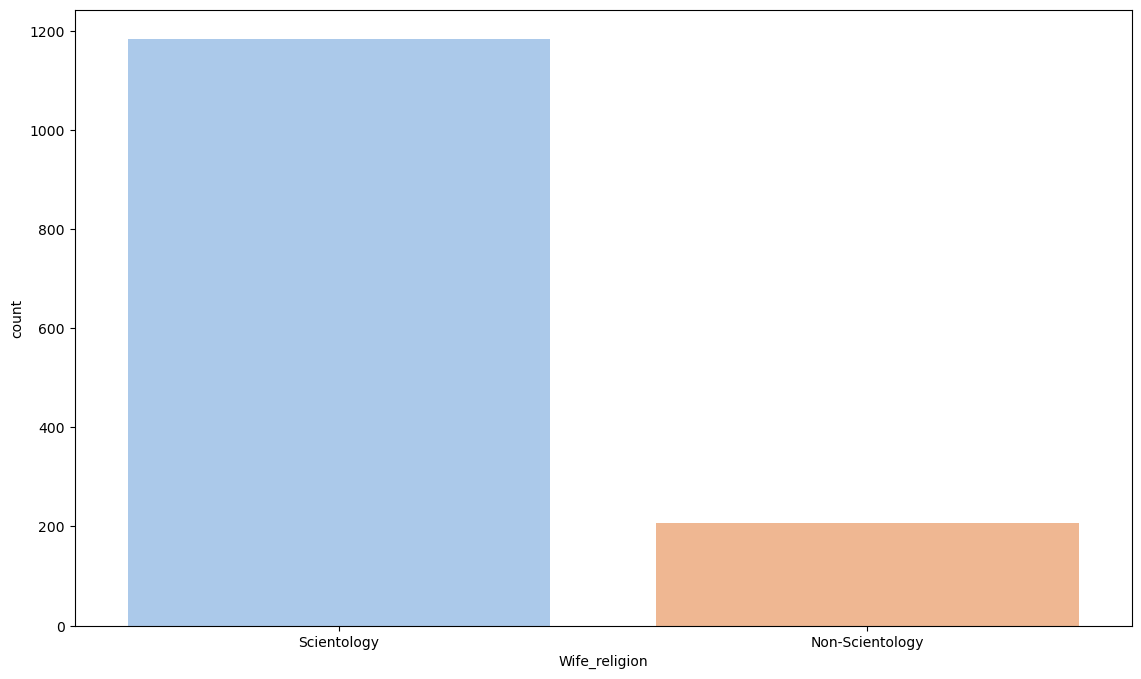

Wife_Working


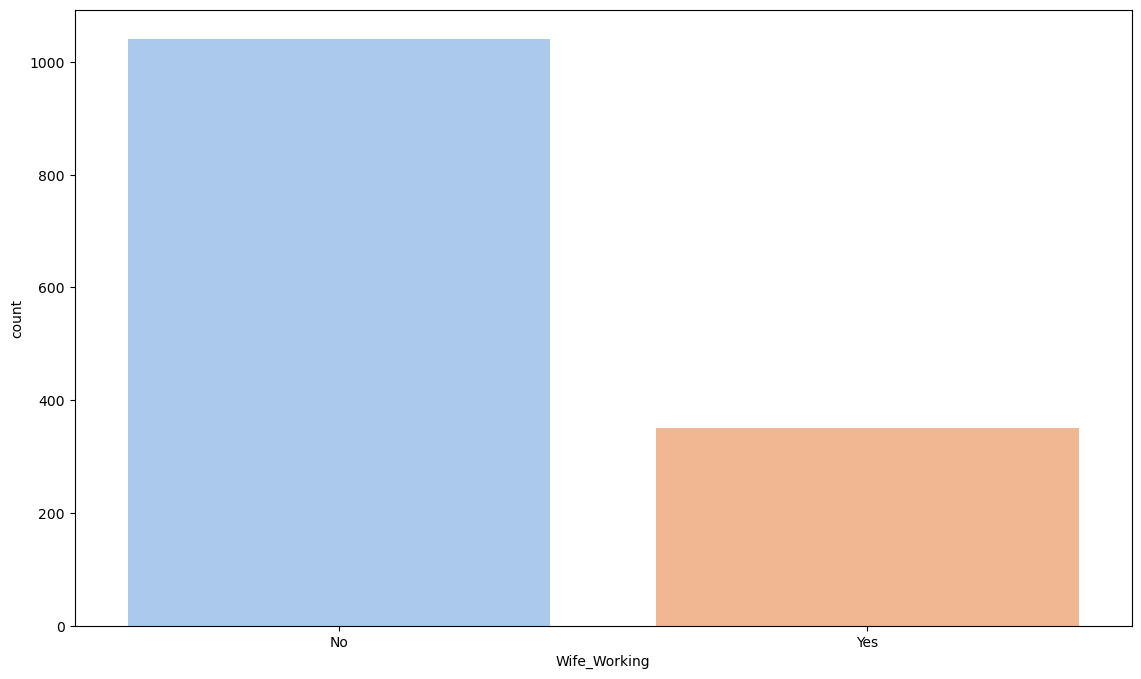

Standard_of_living_index


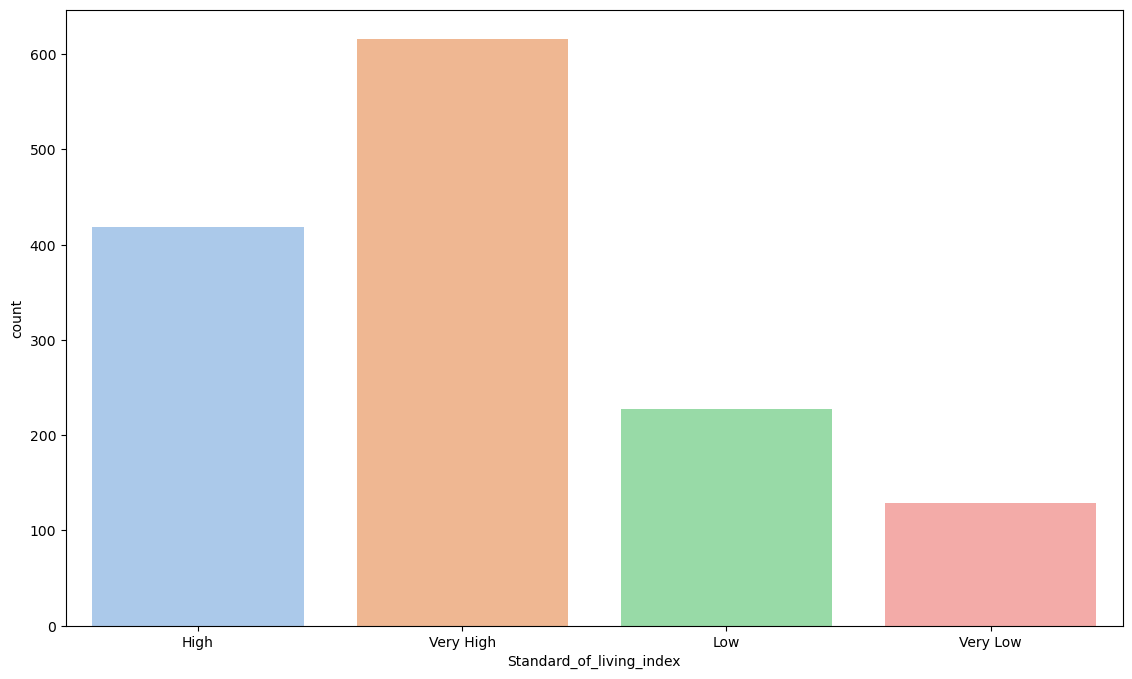

Media_exposure 


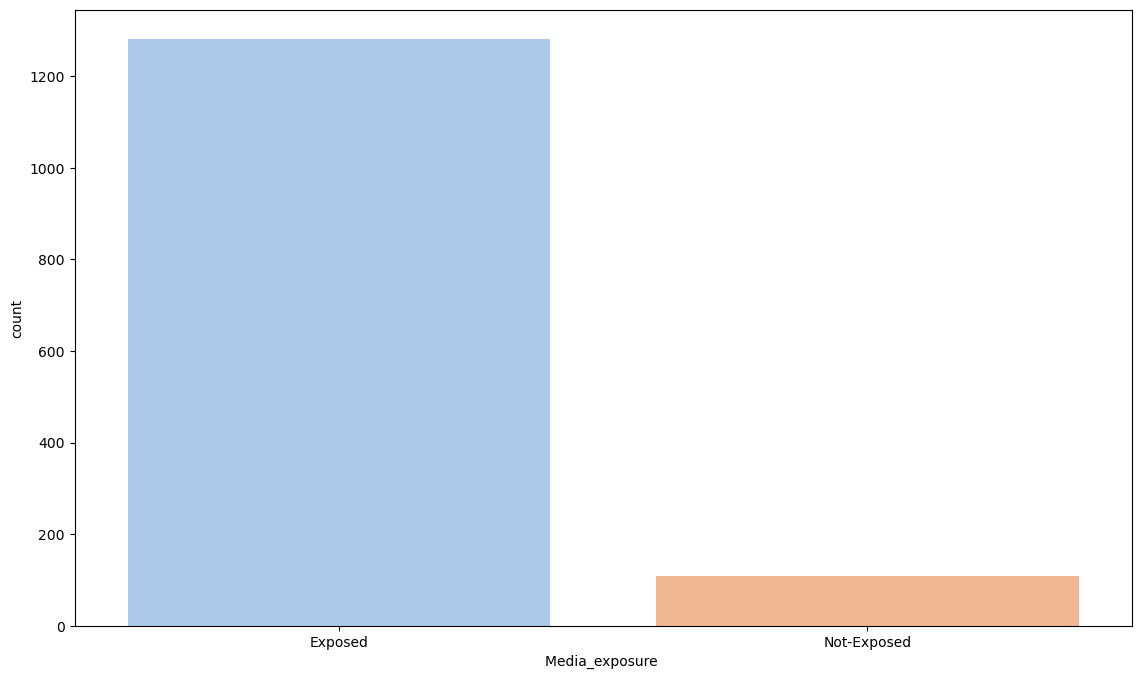

Contraceptive_method_used


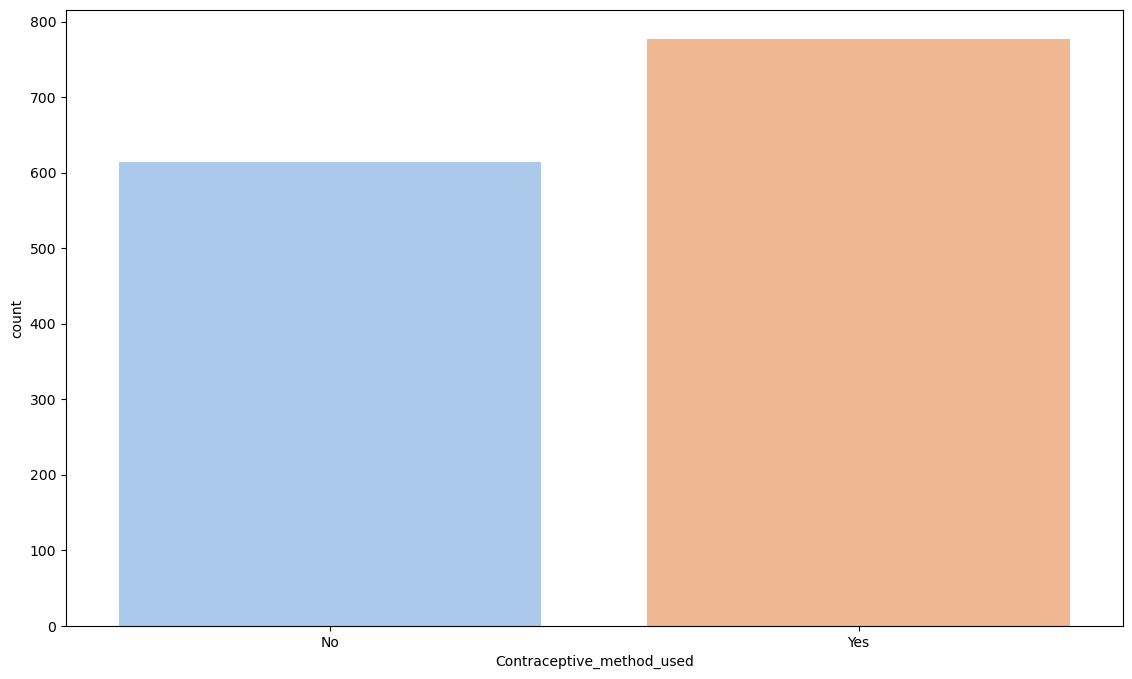

In [32]:
for col in data_df_cat[:]:
    print(col)
    plt.figure(figsize=(30,8))
    plt.subplot(1,2,1)
    sns.countplot(x=data_df_cat[col],  palette='pastel')
    plt.show()

Observation:
    
The number of uneducated in women is 150 around. The highest educated women is 500+ which is pretty hight that means womens are more educated. Basic education of primary is done by 350 people.

The highest educated women is 800+ which is pretty hight that means Men are more educated in highest degree. There are very few less uneducated men.

The Wife working count is very less compared to non working women.


## Bivariant analysis

<Axes: xlabel='Husband_Occupation', ylabel='Wife_age'>

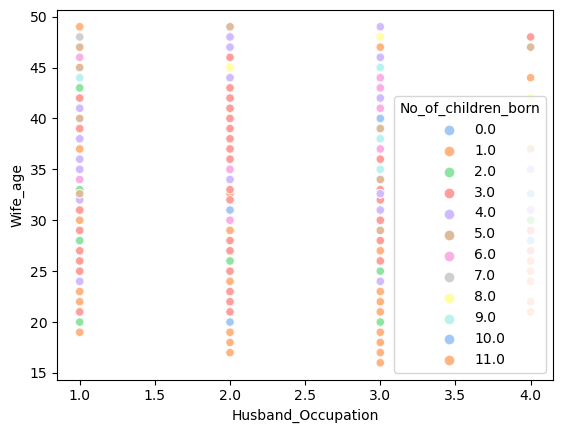

In [33]:
sns.scatterplot(y='Wife_age', x='Husband_Occupation', hue='No_of_children_born', data=data_df_num, palette='pastel')

<Axes: >

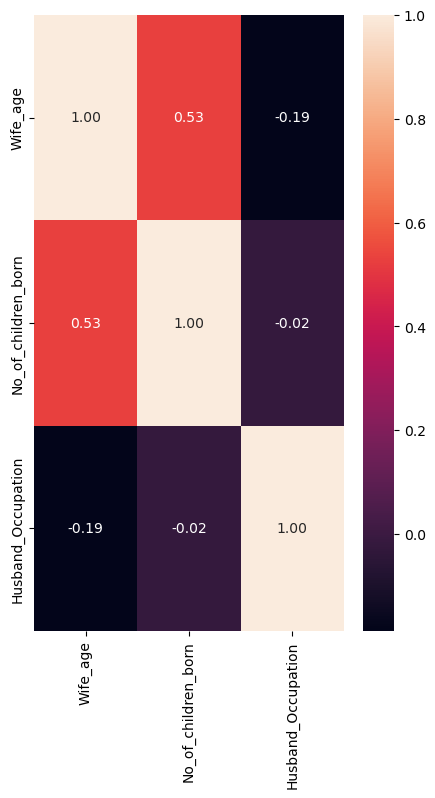

In [34]:
# relation between all numeric variables
plt.figure(figsize=(5,8))
sns.heatmap(data_df_num.corr(), annot=True, fmt='.2f')

<Axes: xlabel='Husband_Occupation', ylabel='Wife_Working'>

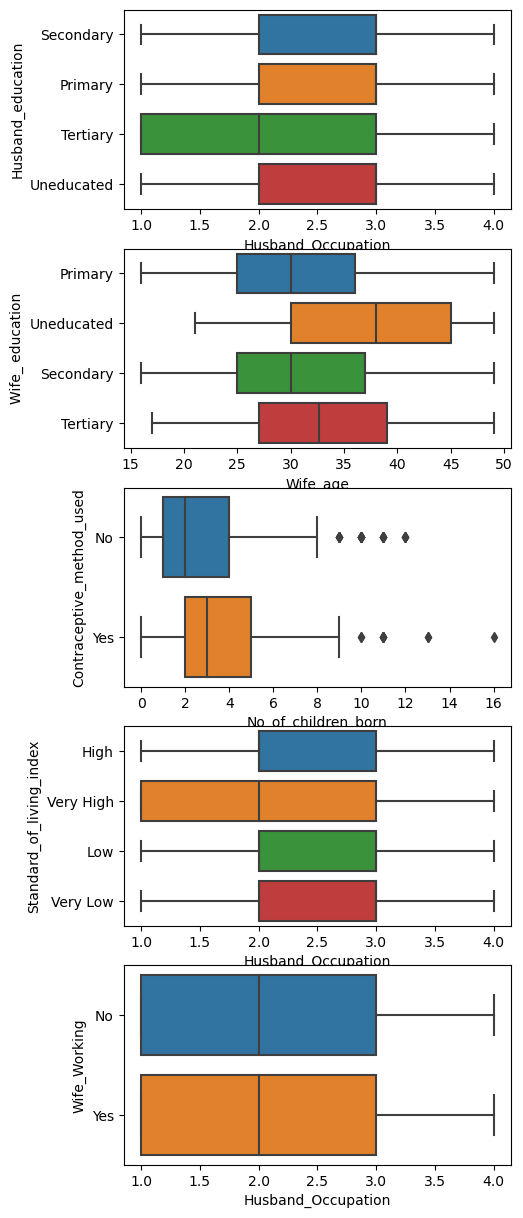

In [35]:
# categorical vs numerical
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(5,15)
sns.boxplot(data=data_df, x='Husband_Occupation', y='Husband_education', ax=axes[0])
sns.boxplot(data=data_df, x='Wife_age', y='Wife_ education', ax=axes[1])
sns.boxplot(data=data_df, x='No_of_children_born', y='Contraceptive_method_used', ax=axes[2])
sns.boxplot(data=data_df, x='Husband_Occupation', y='Standard_of_living_index', ax=axes[3])
sns.boxplot(data=data_df, x='Husband_Occupation', y='Wife_Working', ax=axes[4])

## Decision Tree

In [36]:
data_df_decision = data_df.copy()

In [37]:
data_df_decision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1391 non-null   float64
 1   Wife_ education            1391 non-null   object 
 2   Husband_education          1391 non-null   object 
 3   No_of_children_born        1391 non-null   float64
 4   Wife_religion              1391 non-null   object 
 5   Wife_Working               1391 non-null   object 
 6   Husband_Occupation         1391 non-null   int64  
 7   Standard_of_living_index   1391 non-null   object 
 8   Media_exposure             1391 non-null   object 
 9   Contraceptive_method_used  1391 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.5+ KB


#### Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
#### The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.

In [38]:
for feature in data_df_decision.columns: 
    if data_df_decision[feature].dtype == 'object': 
        data_df_decision[feature] = pd.Categorical(data_df_decision[feature]).codes

In [39]:
data_df_decision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1391 non-null   float64
 1   Wife_ education            1391 non-null   int8   
 2   Husband_education          1391 non-null   int8   
 3   No_of_children_born        1391 non-null   float64
 4   Wife_religion              1391 non-null   int8   
 5   Wife_Working               1391 non-null   int8   
 6   Husband_Occupation         1391 non-null   int64  
 7   Standard_of_living_index   1391 non-null   int8   
 8   Media_exposure             1391 non-null   int8   
 9   Contraceptive_method_used  1391 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 53.0 KB


In [40]:
data_df_decision['Contraceptive_method_used'].value_counts()

1    777
0    614
Name: Contraceptive_method_used, dtype: int64

In [41]:
# capture the target column ("Contraceptive_method_used") into separate vectors for training set and test set

X = data_df_decision.drop("Contraceptive_method_used" , axis=1)

y = data_df_decision.pop("Contraceptive_method_used")

In [42]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [43]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [44]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [45]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Contra_Tree_File = open('contra_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Contra_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Contra_Tree_File.close()


In [46]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                               Imp
Wife_age                  0.317699
No_of_children_born       0.265808
Wife_ education           0.116027
Standard_of_living_index  0.098719
Husband_education         0.058686
Wife_Working              0.052147
Husband_Occupation        0.048818
Wife_religion             0.031067
Media_exposure            0.011029


### Predicting Test Data

In [47]:
y_predict = dt_model.predict(X_test)

In [48]:
y_predict.shape

(418,)

## Regularising the Decision Tree

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring='accuracy')
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=True)

In [55]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
reg_dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(max_depth=10)

## Generating New Tree after regualarising the tree.

In [56]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Contra_Tree_File_Reg = open('contra_tree_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Contra_Tree_File_Reg, feature_names = list(X_train), class_names = list(train_char_label))

Contra_Tree_File_Reg.close()


In [57]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                               Imp
No_of_children_born       0.350664
Wife_age                  0.284999
Wife_ education           0.144137
Standard_of_living_index  0.081094
Wife_Working              0.037413
Husband_education         0.034225
Husband_Occupation        0.031899
Wife_religion             0.021932
Media_exposure            0.013637


## Predicting on Training and Test dataset

In [58]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [59]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (973,)
ytest_predict (418,)


## Getting the Predicted Classes

In [60]:
ytest_predict

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

## Getting the Predicted Probabilities

In [61]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.31578947, 0.68421053],
       [0.2       , 0.8       ],
       [0.33333333, 0.66666667],
       [0.6       , 0.4       ],
       [0.31578947, 0.68421053],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.52631579, 0.47368421],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [1.        , 0.        ],
       [0.31578947, 0.68421053],
       [0.        , 1.        ],
       [0.20338983, 0.79661017],
       [0.23404255, 0.76595745],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.30769231, 0.69230769],
       [1.        , 0.        ],
       [0.17647059, 0.82352941],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [1.

In [62]:
 pd.DataFrame(ytest_predict_prob).head()

0         1
0  1.000000  0.000000
1  1.000000  0.000000
2  0.315789  0.684211
3  0.200000  0.800000
4  0.333333  0.666667

# Model Evaluation

## Measuring AUC-ROC Curve

In [63]:
import matplotlib.pyplot as plt

## AUC and ROC for the training data

AUC: 0.927


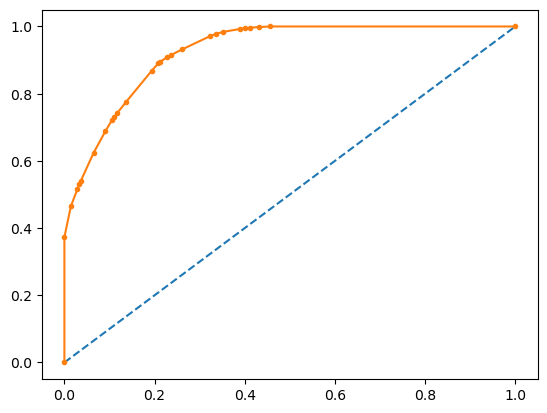

In [64]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.660


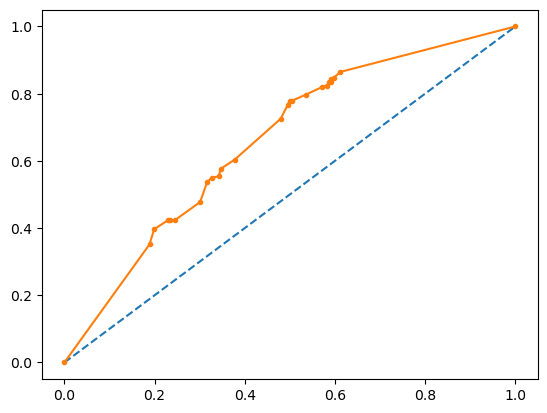

In [65]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [1472]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [1473]:
cm = confusion_matrix(train_labels, ytrain_predict)

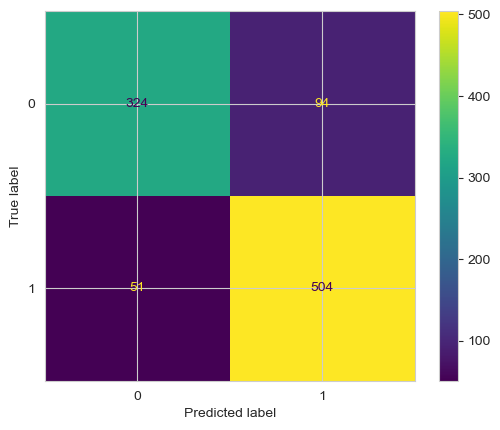

In [1475]:
dis = (ConfusionMatrixDisplay(confusion_matrix = cm))
dis.plot()

In [1467]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.8509763617677287

In [1468]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       418
           1       0.84      0.91      0.87       555

    accuracy                           0.85       973
   macro avg       0.85      0.84      0.85       973
weighted avg       0.85      0.85      0.85       973



## Confusion Matrix for test data

In [1469]:
confusion_matrix(test_labels, ytest_predict)

array([[101,  95],
       [ 56, 166]], dtype=int64)

In [1476]:
cm = confusion_matrix(test_labels, ytest_predict)

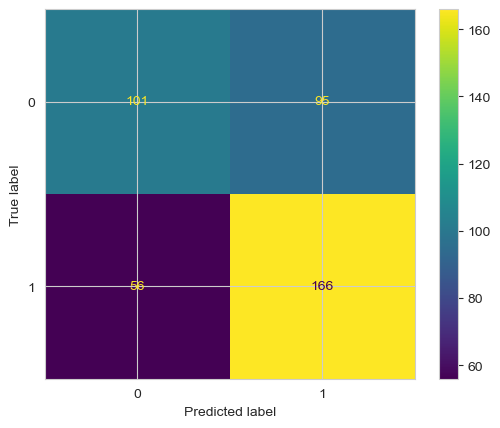

In [1477]:
dis = (ConfusionMatrixDisplay(confusion_matrix = cm))
dis.plot()

In [1470]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.638755980861244

In [1471]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       196
           1       0.64      0.75      0.69       222

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.63       418



## Observation

1) The train data has a accuracy of 85% whereas the test data as around 64%. The model is overfit.Since its not same.
2) The Precision is 86% and 84% for class 0 and 1. Which means the Type 1 error.
3) The recall is pretty high which indicates the type 2 error.
4) It falls into type1 error type.
5) 375 are class 0(no contracetive used) and 598 are people where contraceptive used.

# Logistic Regression

In [1024]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [1169]:
data_df_log = data_df.copy()

In [1170]:
data_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1391 non-null   float64
 1   Wife_ education            1391 non-null   object 
 2   Husband_education          1391 non-null   object 
 3   No_of_children_born        1391 non-null   float64
 4   Wife_religion              1391 non-null   object 
 5   Wife_Working               1391 non-null   object 
 6   Husband_Occupation         1391 non-null   int64  
 7   Standard_of_living_index   1391 non-null   object 
 8   Media_exposure             1391 non-null   object 
 9   Contraceptive_method_used  1391 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.5+ KB


In [1172]:
data_df_log.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [1171]:
for feature in data_df_log.columns: 
    if data_df_log[feature].dtype == 'object': 
        print(feature)
        print(data_df_log[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      513
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      825
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1184
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1041
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    616
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1282
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    777
No     614
Name: Contraceptive_method_used, dtype: int64




### Changing the Wife education and husband education by grouping primary secondat anf tertiary to education group and rest to uneducated.

In [1185]:
data_df_log['Wife_ education']=np.where(data_df_log['Wife_ education'] =='Tertiary', 'Educated', data_df_log['Wife_ education'])
data_df_log['Wife_ education']=np.where(data_df_log['Wife_ education'] =='Secondary', 'Educated', data_df_log['Wife_ education'])
data_df_log['Wife_ education']=np.where(data_df_log['Wife_ education'] =='Primary', 'Educated', data_df_log['Wife_ education'])
data_df_log['Wife_ education']=np.where(data_df_log['Wife_ education'] =='Uneducated', 'UnEducated', data_df_log['Wife_ education'])

In [1186]:
data_df_log['Husband_education'] = np.where( data_df_log['Husband_education']=='Tertiary', 'Educated', data_df_log['Husband_education'])
data_df_log['Husband_education'] = np.where( data_df_log['Husband_education']=='Secondary', 'Educated', data_df_log['Husband_education'])
data_df_log['Husband_education'] = np.where( data_df_log['Husband_education']=='Primary', 'Educated', data_df_log['Husband_education'])
data_df_log['Husband_education'] = np.where( data_df_log['Husband_education']=='Uneducated', 'UnEducated', data_df_log['Husband_education'])

### Changing the Media_exposure with Exposed as 1 and 0 as Not-Exposed

In [1187]:
data_df_log['Media_exposure '] = data_df_log['Media_exposure '].replace({'Exposed': 1, 'Not-Exposed': 0})

In [1188]:
data_df_log['Media_exposure '].value_counts()

1    1282
0     109
Name: Media_exposure , dtype: int64

### Changing the Contraceptive_method_used with Yes as 1 and 0 as NO.

In [1189]:
data_df_log['Contraceptive_method_used'] = data_df_log['Contraceptive_method_used'].replace({'Yes': 1, 'No': 0})

In [1190]:
data_df_log['Contraceptive_method_used'].value_counts()

1    777
0    614
Name: Contraceptive_method_used, dtype: int64

In [1191]:
data_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1391 non-null   float64
 1   Wife_ education            1391 non-null   object 
 2   Husband_education          1391 non-null   object 
 3   No_of_children_born        1391 non-null   float64
 4   Wife_religion              1391 non-null   object 
 5   Wife_Working               1391 non-null   object 
 6   Husband_Occupation         1391 non-null   int64  
 7   Standard_of_living_index   1391 non-null   object 
 8   Media_exposure             1391 non-null   int64  
 9   Contraceptive_method_used  1391 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 119.5+ KB


In [1192]:
data_df_log.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0        Educated          Educated                  3.0   
1      45.0      UnEducated          Educated                 10.0   
2      43.0        Educated          Educated                  7.0   
3      42.0        Educated          Educated                  9.0   
4      36.0        Educated          Educated                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

   Media_exposure   Contraceptive_method_used  
0                1                          0  
1                1                          0  
2                1                          0  
3                1                          0  
4                1                          0

In [1193]:
## Converting the other 'object' type variables as dummy variables

data_df_log_dummy = pd.get_dummies(data_df_log,drop_first=True)
data_df_log_dummy.head()

Wife_age  No_of_children_born  Husband_Occupation  Media_exposure   \
0      24.0                  3.0                   2                1   
1      45.0                 10.0                   3                1   
2      43.0                  7.0                   3                1   
3      42.0                  9.0                   3                1   
4      36.0                  8.0                   3                1   

   Contraceptive_method_used  Wife_ education_UnEducated  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Husband_education_UnEducated  Wife_religion_Scientology  Wife_Working_Yes  \
0                             0                          1                 0   
1                             0                          1                 0   
2                             0                          1                 0   
3                             0                          1                 0   
4                             0                          1                 0   

   Standard_of_living_index_Low  Standard_of_living_index_Very High  \
0                             0                                   0   
1                             0                                   1   
2                             0                                   1   
3                             0                                   0   
4                             1                                   0   

   Standard_of_living_index_Very Low  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0

## Train Test split

In [1207]:
# Copy all the predictor variables into X dataframe
X = data_df_log_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = data_df_log_dummy['Contraceptive_method_used']

In [1208]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1209]:
y_train.value_counts(1)

1    0.570401
0    0.429599
Name: Contraceptive_method_used, dtype: float64

In [1210]:
y_test.value_counts(1)

1    0.5311
0    0.4689
Name: Contraceptive_method_used, dtype: float64

In [1211]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\subra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting on Training and Test dataset

In [1212]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [1213]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.835371  0.164629
1  0.682865  0.317135
2  0.604449  0.395551
3  0.552432  0.447568
4  0.256010  0.743990

In [1214]:
ytrain_predict_prob = model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

0         1
0  0.278888  0.721112
1  0.225512  0.774488
2  0.770428  0.229572
3  0.577135  0.422865
4  0.272448  0.727552

## Model Evaluation

In [1215]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6772867420349434

AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction

ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.

AUC: 0.703


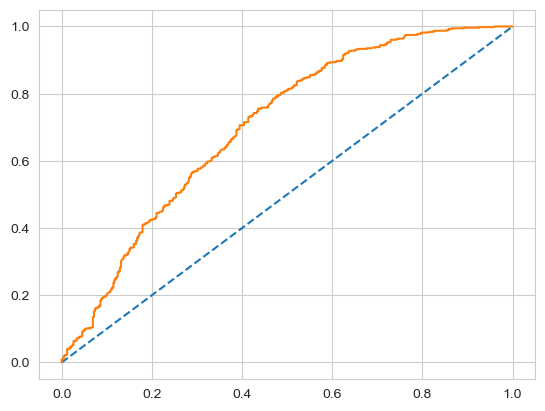

In [1216]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1217]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6196172248803827

### AUC and ROC for the test data

AUC: 0.703


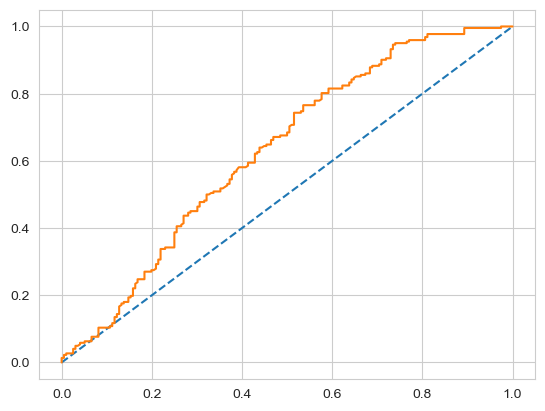

In [1218]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [1220]:
print(confusion_matrix(y_train, ytrain_predict))

[[200 218]
 [ 96 459]]


In [1221]:
cm = confusion_matrix(y_train, ytrain_predict)

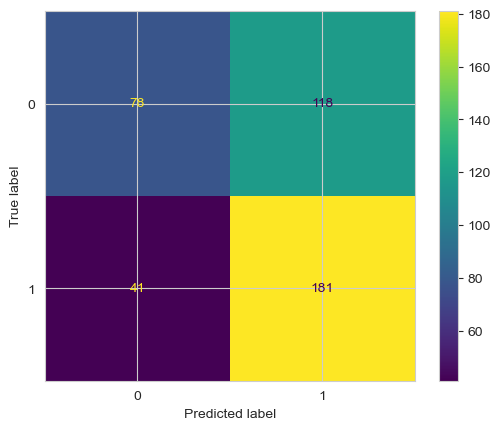

In [1227]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [1223]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       418
           1       0.68      0.83      0.75       555

    accuracy                           0.68       973
   macro avg       0.68      0.65      0.65       973
weighted avg       0.68      0.68      0.67       973



## Confusion Matrix for test data

In [1224]:
print(confusion_matrix(y_test, ytest_predict))

[[ 78 118]
 [ 41 181]]


In [1225]:
cm = confusion_matrix(y_test, ytest_predict)

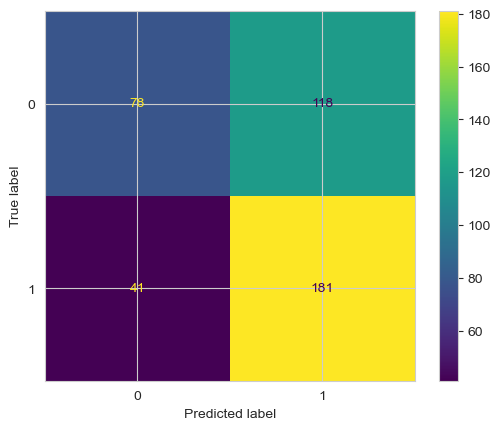

In [1226]:
dis = ConfusionMatrixDisplay(confusion_matrix = cm)
dis.plot()

In [1228]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50       196
           1       0.61      0.82      0.69       222

    accuracy                           0.62       418
   macro avg       0.63      0.61      0.60       418
weighted avg       0.63      0.62      0.60       418



## Observations:

    •	There is no overfitting in the dataset. Since train and test dataset values are same.
    
•	The Accuracy score is 70%. Can be considered as moderately best model.

•	The Recall of class 1 is high 0.83 means the type 2 error is low.

•	But for class 0 its low hence we can say the type 2 error exists.

•	The Precision for class 1 and 0 is 0.68 which means the ratio of contraceptive used by total of used and false predicted.

•	There is a chance of type 1 error.

•	In this case the Type 1 error could be more looked into since if the number of false positives increases then chances are No of Childers born might increase due to non-usage of contraceptive.


## LDA LINEAR DISCRIMINANT ANALYSIS

In [1257]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale

In [1293]:
# Creating a copy of the original data frame
df_lda = data_df.copy()

In [1294]:
df_lda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1391 non-null   float64
 1   Wife_ education            1391 non-null   object 
 2   Husband_education          1391 non-null   object 
 3   No_of_children_born        1391 non-null   float64
 4   Wife_religion              1391 non-null   object 
 5   Wife_Working               1391 non-null   object 
 6   Husband_Occupation         1391 non-null   int64  
 7   Standard_of_living_index   1391 non-null   object 
 8   Media_exposure             1391 non-null   object 
 9   Contraceptive_method_used  1391 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.5+ KB


In [1295]:
df_lda['Wife_ education']=np.where(df_lda['Wife_ education'] =='Tertiary', '3', df_lda['Wife_ education'])
df_lda['Wife_ education']=np.where(df_lda['Wife_ education'] =='Secondary', '2', df_lda['Wife_ education'])
df_lda['Wife_ education']=np.where(df_lda['Wife_ education'] =='Primary', '1', df_lda['Wife_ education'])
df_lda['Wife_ education']=np.where(df_lda['Wife_ education'] =='Uneducated', '0', df_lda['Wife_ education'])


df_lda['Husband_education'] = np.where( df_lda['Husband_education']=='Tertiary', '3', df_lda['Husband_education'])
df_lda['Husband_education'] = np.where( df_lda['Husband_education']=='Secondary', '2', df_lda['Husband_education'])
df_lda['Husband_education'] = np.where( df_lda['Husband_education']=='Primary', '1', df_lda['Husband_education'])
df_lda['Husband_education'] = np.where( df_lda['Husband_education']=='Uneducated', '0', df_lda['Husband_education'])

df_lda['Media_exposure '] = df_lda['Media_exposure '].replace({'Exposed': 1, 'Not-Exposed': 0})

df_lda['Contraceptive_method_used'] = df_lda['Contraceptive_method_used'].replace({'Yes': 1, 'No': 0})

df_lda['Wife_religion'] = df_lda['Wife_religion'].replace({'Scientology': 1, 'Non-Scientology': 0})

df_lda['Wife_Working'] = df_lda['Wife_Working'].replace({'Yes': 1, 'No': 0})

df_lda['Standard_of_living_index'] = np.where(df_lda['Standard_of_living_index'] == 'Very High', '3', df_lda['Standard_of_living_index'])
df_lda['Standard_of_living_index'] = np.where(df_lda['Standard_of_living_index'] == 'High', '2', df_lda['Standard_of_living_index'])
df_lda['Standard_of_living_index'] = np.where(df_lda['Standard_of_living_index'] == 'Low' ,'1', df_lda['Standard_of_living_index'])
df_lda['Standard_of_living_index'] = np.where(df_lda['Standard_of_living_index'] == 'Very Low', '0', df_lda['Standard_of_living_index'])
                                              

In [1296]:
df_lda.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               1                 2                  3.0   
1      45.0               0                 2                 10.0   
2      43.0               1                 2                  7.0   
3      42.0               2                 1                  9.0   
4      36.0               2                 2                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation Standard_of_living_index  \
0              1             0                   2                        2   
1              1             0                   3                        3   
2              1             0                   3                        3   
3              1             0                   3                        2   
4              1             0                   3                        1   

   Media_exposure   Contraceptive_method_used  
0                1                          0  
1                1                          0  
2                1                          0  
3                1                          0  
4                1                          0

In [1297]:
X = df_lda.drop('Contraceptive_method_used',axis=1)
Y = df_lda.pop('Contraceptive_method_used')

In [1298]:
Y.value_counts()

1    777
0    614
Name: Contraceptive_method_used, dtype: int64

In [1299]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

### Applying Standard Scaler to scale the data

In [1300]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

## Build LDA Model

In [1301]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

## Prediction on train and test data

In [1302]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

## Confusion Matrix and classification report for training data

In [1303]:
print(confusion_matrix(Y_train,Ytrain_predict))

[[218 211]
 [109 435]]


In [1304]:
cm = confusion_matrix(Y_train,Ytrain_predict)

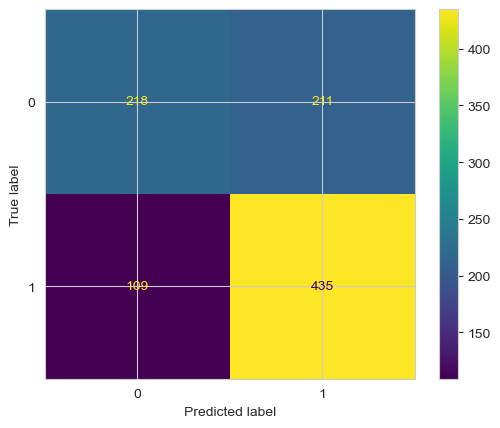

In [1305]:
dis = ConfusionMatrixDisplay(confusion_matrix = cm)
dis.plot()

### 327 rows classified as 0 (Contraceptive method not used) and 646 rows classified as 1 (Contraceptive used).

In [1306]:
print(classification_report(Y_train,Ytrain_predict))7

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       429
           1       0.67      0.80      0.73       544

    accuracy                           0.67       973
   macro avg       0.67      0.65      0.65       973
weighted avg       0.67      0.67      0.66       973



In [1317]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

AUC for the Training Data: 0.716


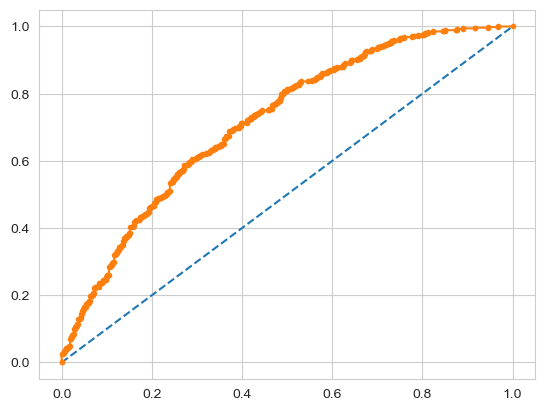

In [1318]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

## Confusion Matrix and classification report for test data

In [1308]:
print(confusion_matrix(Y_test,Ytest_predict))

[[ 82 103]
 [ 46 187]]


In [1309]:
cm = confusion_matrix(Y_test,Ytest_predict)

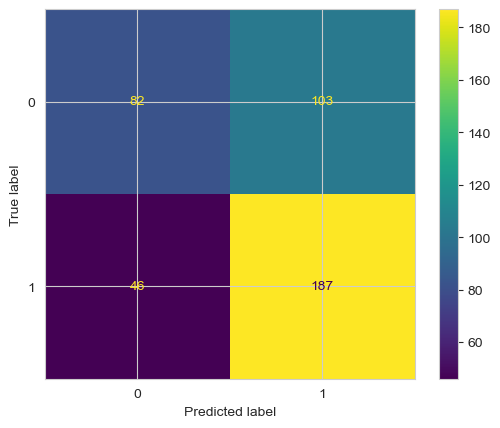

In [1310]:
dis = ConfusionMatrixDisplay(confusion_matrix = cm)
dis.plot()

In [1311]:
print(classification_report(Y_test,Ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       185
           1       0.64      0.80      0.72       233

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418



In [1313]:
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Test Data: 0.664


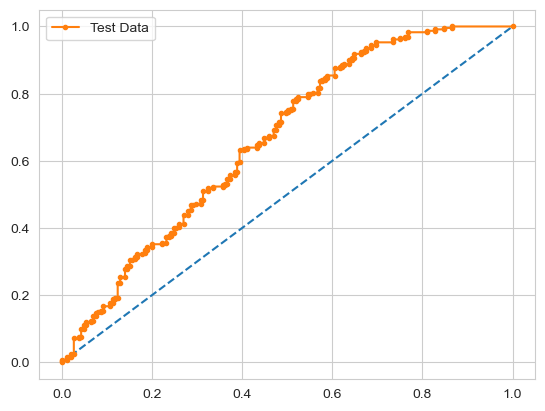

In [1316]:
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [1319]:
pred_prob_train[:,1]

array([0.6842637 , 0.66894974, 0.54446085, 0.57000979, 0.36205733,
       0.56575156, 0.54157206, 0.85308089, 0.28451573, 0.73645726,
       0.50794447, 0.47673493, 0.46084692, 0.72860325, 0.63887786,
       0.31994266, 0.4559784 , 0.54967839, 0.83305162, 0.60955197,
       0.69276688, 0.37643222, 0.32208153, 0.68950168, 0.28651628,
       0.35957884, 0.71530701, 0.79778185, 0.16459474, 0.36347819,
       0.76532241, 0.68579839, 0.5932546 , 0.68934019, 0.7725206 ,
       0.83947888, 0.35375258, 0.21175623, 0.41131804, 0.68274938,
       0.30889337, 0.74482129, 0.52588137, 0.86303289, 0.43162501,
       0.42203532, 0.68137537, 0.65313253, 0.63114949, 0.51884134,
       0.68434443, 0.4304034 , 0.19105735, 0.31241057, 0.81385109,
       0.65463244, 0.74244346, 0.60893296, 0.59677664, 0.49964198,
       0.67909806, 0.70127809, 0.68420042, 0.63981905, 0.71382299,
       0.5103457 , 0.29310033, 0.68693849, 0.44152426, 0.495953  ,
       0.4828598 , 0.52008253, 0.71954612, 0.76246543, 0.54078

## Generate Coefficients and intercept for the Linear Discriminant Function

In [1321]:
#intercept value
clf.intercept_ 

array([0.27954013])

In [1322]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.5901669 ,  0.51565842,  0.02211671,  0.74102214, -0.17831849,
        -0.0781729 ,  0.14664399,  0.31067826,  0.08943409]])

In [1323]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [1324]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.59,  0.52,  0.02,  0.74, -0.18, -0.08,  0.15,  0.31,  0.09]])

## Observation:
By the above equation and the coefficients it is clear that¶

1) No_of_children_born has the largest magnitude thus this helps in classifying the best.

2) Wife_age has the small magnitude thus this helps in classifying the least.

3) The Recall of class 1 is high 0.80 means the type 2 error is low.But for class 0 its low hence we can say the type 2 error exists.

4) The Precision for class 1 and 0 is 0.67 which means the ratio of contraceptive used by total of used and false predicted.

5) In this case the Type 1 error could be more looked into since if the number of false positives increases then chances are No of Childers born might increase due to non-usage of contraceptive.
